In [5]:
import pandas as pd
df = pd.read_json('lastdata_semantic_scholar.json')

In [6]:
df

citations  img_num  \
0                      [5, 17, 15]       10   
1                               []        5   
2                   [6, 34, 21, 2]        9   
3                               []        9   
4                               []       16   
5                               []        8   
6                               []        0   
7                               []        9   
8                               []        7   
9                  [20, 36, 27, 3]        3   
10                              []       21   
11             [208, 959, 667, 31]        0   
12                    [18, 38, 24]       13   
13                              []        6   
14             [208, 959, 667, 31]        0   
15                              []        9   
16                              []        2   
17                              []        9   
18                              []        3   
19                              []        3   
20                              []        8   
21                    [17, 34, 32]       10   
22                              []        9   
23             [178, 320, 298, 25]        8   
24                 [14, 44, 38, 1]        3   
25                              []       16   
26                      [2, 11, 6]        7   
27                    [11, 55, 39]        4   
28                              []        9   
29                              []        5   
...                            ...      ...   
24853                           []       20   
24854          [403, 845, 801, 44]        6   
24855                           []        7   
24856          [134, 396, 286, 31]        3   
24857                           []       19   
24858                           []       15   
24859                           []       12   
24860                  [4, 22, 12]        5   
24861                           []       12   
24862                           []        9   
24863                           []        2   
24864                [6, 11, 8, 2]        9   
24865            [48, 200, 150, 4]       11   
24866          [392, 908, 854, 59]       10   
24867                           []        7   
24868                           []       15   
24869              [13, 34, 17, 4]        3   
24870              [33, 72, 58, 4]        9   
24871          [137, 230, 170, 21]       15   
24872              [38, 86, 70, 2]       12   
24873                   [2, 13, 7]        6   
24874                           []        5   
24875                           []        4   
24876                           []        2   
24877                           []       12   
24878  [5,010, 10,741, 9,428, 391]       20   
24879                           []        8   
24880              [26, 66, 27, 2]       12   
24881                           []        7   
24882               [6, 22, 20, 2]        8   

                                                 img_src  \
0      [https://www.semanticscholar.org/paper/Unsuper...   
1      [https://www.semanticscholar.org/paper/Evaluat...   
2      [https://www.semanticscholar.org/paper/Deep-Fe...   
3      [https://www.semanticscholar.org/paper/Split-d...   
4      [https://www.semanticscholar.org/paper/Grounde...   
5      [https://www.semanticscholar.org/paper/Riemann...   
6                                                     []   
7      [https://www.semanticscholar.org/paper/Adaptiv...   
8      [https://www.semanticscholar.org/paper/Towards...   
9      [https://www.semanticscholar.org/paper/Towards...   
10     [https://www.semanticscholar.org/paper/Predict...   
11                                                    []   
12     [https://www.semanticscholar.org/paper/Hide-an...   
13     [https://www.semanticscholar.org/paper/TD-or-n...   
14                                                    []   
15     [https://www.semanticscholar.org/paper/Robust-...   
16     [https://www.semanticscholar.org/paper/An-Opti...   
17     [https://www.semanticsc

In [240]:
print(len(df))
df.fillna(10000, inplace=True)

24883


In [242]:
title = set()
for i in range(len(df)):
    title.add(df["title"][i][0])

In [244]:
len(title)

12727

In [222]:
max(df["img_num"])
cut = [i for i in range(0, max(df["img_num"]), 2)]
se1 = pd.cut(df["img_num"], cut)

In [235]:
img = []
for i in range(len(df)):
    if df["img_num"][i] < 40:
        img.append(df["img_num"][i])

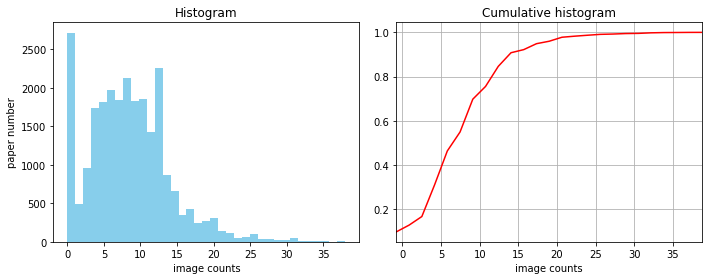

In [238]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
res = stats.cumfreq(img, numbins=25)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(img, bins=35, color="skyblue")
ax1.set_title('Histogram')
ax1.set_xlabel("image counts")
ax1.set_ylabel("paper number")
ax2.plot(x, res.cumcount/res.cumcount.max(), color="red")
ax2.set_title('Cumulative histogram')
ax2.set_xlabel("image counts")
#ax2.set_ylabel("frequency")
ax2.grid()
ax2.set_xlim([x.min(), x.max()])
plt.tight_layout()
plt.savefig('_img_num.png')

In [216]:
x = np.array(a)

In [217]:
x

array([3967, 3782, 3679, 2701, 2472, 2081, 1009,  754,  666,  583,  259,
        105,   99,   71,   62,   39,   29,   11,   11,   10,    9,    7,
          4,    3,    3,    3,    2,    2,    2,    2,    1,    1,    1,
          1,    1,    1,    1,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

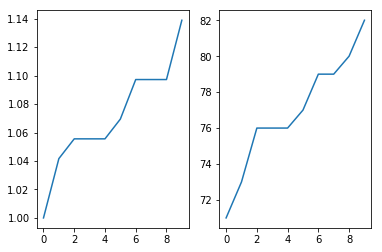

In [218]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#arr = np.random.normal(size=100)

plt.subplot(121)
hist, bin_edges = np.histogram(x)
hist = hist / max(hist)
cdf = np.cumsum(hist)
plt.plot(cdf)

plt.subplot(122)
cdf = stats.cumfreq(x)
plt.plot(cdf[0])
plt.show()

# topic语义挖掘 word2vec

In [122]:
import gensim

# 构建语料库
texts = []
for i in range(len(df)):
    for topic in df["topic"][i]:
        words = topic.upper().split(' ')
        #print(words)
        texts.append(words)

In [123]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [247]:
len(corpus)
query = dictionary.doc2bow(["IMAGE"])

In [248]:
query

[(24, 1)]

In [249]:
from gensim import models
tfidf = models.TfidfModel(corpus)

In [250]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow])

[(0, 0.8866355779311725), (1, 0.46246875780603364)]


In [251]:
lsi_model = models.LsiModel(corpus, id2word=dictionary, num_topics=8)
documents = lsi_model[corpus]

In [252]:
query_vec = lsi_model[query]

In [253]:
from gensim import similarities
index = similarities.MatrixSimilarity(documents)

In [255]:
sims = index[query_vec]
result = set()
for pos, pro in enumerate(sims):
    if pro > 0.999:
        a = ' '.join(texts[pos]).lower()
        result.add(a)
print("image")
result

image


{'2k resolution',
 '3-d image',
 '4k resolution',
 '8k resolution',
 'acronis true image',
 'amd accelerated processing unit',
 'analytic signal',
 'audio feedback',
 'audio signal processing',
 'auditory processing disorder',
 'automatic image annotation',
 'batch processing',
 'binary image',
 'blind signal separation',
 'central pattern generator',
 'central processing unit',
 'clock signal',
 'composite image filter',
 'constructive solid geometry',
 'content-based image retrieval',
 'core image',
 'data processing inequality',
 'dec text processing utility',
 'digital image',
 'digital image processing',
 'digital signal processing',
 'digital signal processor',
 'discrete-time signal',
 'document processing',
 'epipolar geometry',
 'extension (mac os)',
 'fused image',
 'gating signal',
 'geometry processing',
 'gigapixel image',
 'headroom (audio signal processing)',
 'html5 audio',
 'image',
 'image analogy',
 'image compression',
 'image editing',
 'image formation',
 'image f

In [ ]:
vision -- image

In [73]:
df.fillna(-1, inplace=True)
venue_dic = dict()
for i in range(len(df)):
    if df["venue"][i] != -1 and df["venue"][i]:
        #print(df["venue"][i])
        if df["venue"][i][0].upper() not in venue_dic:
            venue_dic[df["venue"][i][0].upper()] = 1
        else:
            venue_dic[df["venue"][i][0].upper()] += 1

In [76]:
#venue_dic

In [77]:
for i in range(len(df)):
    if df["meeting"][i]:
        venue = df["meeting"][i][0].split('/')[1].split('.')[0].upper()
        if venue not in venue_dic:
            venue_dic[venue] = 1
        else:
            venue_dic[venue] += 1

In [95]:
venue_dic = dict(sorted(venue_dic.items(), key=lambda item:item[1], reverse=True))

In [172]:
plt_venue_dic = dict()
for (key, value) in venue_dic.items():
    #print(key, value)
    if value > 100:
        plt_venue_dic[key] = value
plt_venue_dic

{'ARXIV': 6844,
 'CVPR': 2453,
 'ICLR': 2004,
 'V1': 1342,
 'ICML': 1263,
 'NIPS': 1246,
 'ICCV': 612,
 'AAAI': 555}

In [220]:
import matplotlib.pyplot as plt
import numpy as np
X = np.arange(8) + 1
plt.bar(X, plt_venue_dic.values(), color='skyblue')
plt.xticks(X,plt_venue_dic.keys())
for a, b in zip(X, plt_venue_dic.values()):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom') 
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('venue.png')
plt.show()

In [257]:
from gensim.models import word2vec
import gensim

# 构建语料库
texts = []
for i in range(len(df)):
    for topic in df["topic"][i]:
        words = topic.upper().split(' ')
        #print(words)
        texts.append(words)

In [292]:
for i in range(len(texts)):
    print(texts[i])

['LOOPBACK']
['3D', 'MODELING']
['FACIAL', 'RECOGNITION', 'SYSTEM']
['PIXEL']
['DIALOG', 'SYSTEM']
['BLEU']
['SCALABILITY']
['APPROXIMATION']
['EXPERIMENT']
['COMPUTABILITY']
['PROGRAMMING', 'PARADIGM']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['DEEP', 'LEARNING']
['NETWORK', 'ARCHITECTURE']
['LINEAR', 'INTERPOLATION']
['IMAGE', 'RESOLUTION']
['DISPLAY', 'RESOLUTION']
['HIGH-', 'AND', 'LOW-LEVEL']
['ALGORITHM']
['EXPERIMENT']
['CAUSAL', 'FILTER']
['DATA', 'MINING']
['RECOMMENDER', 'SYSTEM']
['TIME', 'SERIES']
['ONLINE', 'AND', 'OFFLINE']
['ESTIMATED']
['ALGORITHM']
['CAUSALITY']
['CLOSING', '(MORPHOLOGY)']
['WORD', 'LISTS', 'BY', 'FREQUENCY']
["JENSEN'S", 'INEQUALITY']
['AMAZONA']
['TEXTUAL', 'ENTAILMENT']
['COMPUTATIONAL', 'SEMANTICS']
['ERROR', 'ANALYSIS', '(MATHEMATICS)']
['STATISTICAL', 'MODEL']
['POSSIBLE', 'WORLD']
['MULTIMODAL', 'INTERACTION']
['AUTOENCODER']
['LANGUAGE', 'MODEL']
['KULLBACK–LEIBLER', 'DIVERGENCE']
['LATENT', 'VARIABLE']
['NATURAL', 'LANGUAGE', 'GENERATION'

['LONG', 'SHORT-TERM', 'MEMORY']
['SEMANTIC', 'INTERPRETATION']
['GOOGLE', 'QUESTIONS', 'AND', 'ANSWERS']
['COMPILER']
['ARTIFICIAL', 'INTELLIGENCE']
['NATURAL', 'LANGUAGE', 'UNDERSTANDING']
['ENCODE']
['IBM', 'NOTES']
['TEXTURE', 'SYNTHESIS']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['MATHEMATICAL', 'OPTIMIZATION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['TEXTURE', 'MAPPING']
['RUNTIME', 'SYSTEM']
['GLOSSARY', 'OF', 'COMPUTER', 'GRAPHICS']
['TURING', 'COMPLETENESS']
['DATABASE', 'NORMALIZATION']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['COMPUTER', 'VISION']
['IMAGENET']
['DOMAIN', 'ADAPTATION']
['ALGORITHMIC', 'EFFICIENCY']
['PERFORMANCE']
['CENTREX']
['COMPUTATION']
['COLOR']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['VIRTUALITY', '(GAMING)']
['CANONICAL', 'ACCOUNT']
['AUTOENCODER']
['RECOMMENDER', 'SYSTEM']
['LOSS', 'FUNCTION']
['MISSING', 'DATA']
['EXPERIMENT']
['THE', 'MATRIX']
['COLUMN', '(DATABASE)']
['RECOMMENDER', 'SYSTEM']
['COLLABORATIVE', 'FILTERING']
['FM', 'BROADCASTING']
['MACHINE'

['REAL-TIME', 'CLOCK']
['REAL-TIME', 'TRANSCRIPTION']
['FEATURE', 'LEARNING']
['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['FRAME', '(VIDEO)']
['LATENT', 'VARIABLE']
['END-TO-END', 'PRINCIPLE']
['COMPRESSED', 'SENSING']
['GAUSSIAN', '(SOFTWARE)']
['RECOMMENDER', 'SYSTEM']
['FAIRNESS', 'MEASURE']
['POLARIZATION', '(WAVES)']
['ALGORITHM']
['SOCIAL', 'COMPUTING']
['EXPERIMENT']
['MATHEMATICAL', 'OPTIMIZATION']
['THE', 'MATRIX']
['COMPUTATION']
['SPARSE', 'MATRIX']
['STRUCTURED', 'PREDICTION']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['HANDWRITING', 'RECOGNITION']
['TEST', 'SET']
['STATISTICAL', 'CLASSIFICATION']
['ARTIFICIAL', 'INTELLIGENCE']
['OPTIMAL', 'SUBSTRUCTURE']
['CONDITIONAL', 'RANDOM', 'FIELD']
['IBM', 'NOTES']
['SEMANTIC', 'ROLE', 'LABELING']
['OBJECT', 'DETECTION']
['REVERSE', 'POLISH', 'NOTATION']
['CROSS-REFERENCE']
['BOTTLENECK', '(ENGINEERING)']
['REAL-TIME', 'COMPUTING']
['END-TO-END', 'PRINCIPLE']
['COMPUTATION']
['TIME', 'COMPLEXITY']
['NEURAL', 'NETWORK', 'SIMULATION']
['A

['FIRST-ORDER', 'PREDICATE']
['SYMBOLIC', 'COMPUTATION']
['KNOWLEDGE', 'BASE']
['UNIFICATION', '(COMPUTER', 'SCIENCE)']
['BENCHMARK', '(COMPUTING)']
['RADIAL', '(RADIO)']
["KAI'S", 'POWER', 'TOOLS']
['IMAGENET']
['TENSORFLOW']
['COMPUTER', 'VISION']
['MULTI-LABEL', 'CLASSIFICATION']
['ENTITY']
['KNOWLEDGE', 'GRAPH']
['OPEN-SOURCE', 'SOFTWARE']
['MACHINE', 'LEARNING']
['BENCHMARK', '(COMPUTING)']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['MAP']
['FRAME', '(VIDEO)']
['COMMODITY', 'COMPUTING']
['VOCABULARY']
['DOWNLOAD']
['DIGITAL', 'CURATION']
['EVALUATION', 'FUNCTION']
['SOLID-STATE', 'DRIVE']
['PIXEL']
['DEEP', 'LEARNING']
['UNIFIED', 'FRAMEWORK']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['COMPUTATION']
['IMAGE', 'RESOLUTION']
['SENSOR']
['THINKING', 'OUTSIDE', 'THE', 'BOX']
['MAP']
['UNSUPERVISED', 'LEARNING']
['GRAPHICS', 'CORE', 'NEXT']
['DBPEDIA']
['FREEBASE']
['ENCODER']
['QUESTION', 'ANSWERING']
['RELATIONSHIP', 'EXTRACTION']
['SCALABILITY']
['INFORMATION', 'RETRIEVAL']
['AUTOENC

['RESULTANT']
['RANDOMNESS']
['MACHINE', 'LEARNING']
['TIME', 'COMPLEXITY']
['APPROXIMATION', 'ALGORITHM']
['ITERATION']
['RELEVANCE']
['IMPERATIVE', 'PROGRAMMING']
['BOOTSTRAPPING', '(STATISTICS)']
['NOS']
['FEATURE', 'SELECTION']
['COEFFICIENT']
['MIKUMIKUDANCE']
['LOSS', 'FUNCTION']
['VERGENCE']
['IMAGENET']
['GLOSSARY', 'OF', 'COMPUTER', 'GRAPHICS']
['EXPERIMENT']
['APPROXIMATION', 'ALGORITHM']
['UTILITY', 'FUNCTIONS', 'ON', 'INDIVISIBLE', 'GOODS']
['SUBATOMIC', 'PARTICLE']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['RANDOM', 'FOREST']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['STATISTICAL', 'CLASSIFICATION']
['FLOW', 'NETWORK']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['MINIMUM', 'BOUNDING', 'BOX']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['EXPERIMENT']
['OBJECT', 'DETECTION']
['SENSOR']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['HIGH-', 'AND', 'LOW-LEVEL']
['TOP-DOWN', 'AND', 'BOTTOM-UP', 'DESIGN']
['MARGINAL', 'MODEL']
['FEATURE', 'VECTOR']
['LATERAL', 'THINKING']
['MAP']
['BENCHMARK', '(COMPUTI

['AUGMENTED', 'REALITY']
['VISUAL', 'ODOMETRY']
['GYROSCOPE']
['TREE', 'ACCUMULATION']
['EXPERIMENT']
['WORKSPACE']
['VELOCITY', '(SOFTWARE', 'DEVELOPMENT)']
['AERIAL', 'PHOTOGRAPHY']
['MEAN', 'SQUARED', 'ERROR']
['REAL-TIME', 'CLOCK']
['CAUSALITY']
['MACHINE', 'LEARNING']
['BIG', 'DATA']
['ALGORITHM']
['KNOWLEDGE', 'GRAPH']
['REINFORCEMENT', 'LEARNING']
['OPEN-SOURCE', 'SOFTWARE']
['DATA', 'MINING']
['ANOMALY', 'DETECTION']
['SUPERVISED', 'LEARNING']
['CAUSAL', 'INFERENCE']
['WORLD', 'WIDE', 'WEB']
['SEMI-SUPERVISED', 'LEARNING']
['DOMAIN', 'ADAPTATION']
['TIME', 'SERIES']
['SOURCE', 'DATA']
['CATEGORIZATION']
['SEMICONDUCTOR', 'INDUSTRY']
['STOCHASTIC', 'GRADIENT', 'DESCENT']
['LOSS', 'FUNCTION']
['NEURAL', 'NETWORKS']
['ACTIVATION', 'FUNCTION']
['ALGORITHM']
['PERTURBATION', 'THEORY']
['EXPERIMENT']
['TIME', 'COMPLEXITY']
['IMAGE', 'FUSION']
['LOW-RANK', 'APPROXIMATION']
['COMPUTER', 'PERFORMANCE']
['EXPERIMENT']
['STRUCTURAL', 'SIMILARITY']
['SOFTWARE', 'BUG']
['PIXEL']
['AUTOENCOD

['LIST', 'OF', 'ALGORITHMS']
['EXPERIMENT']
['SOCIAL', 'INEQUALITY']
['TABLE', '(INFORMATION)']
['ALGORITHM']
['REINFORCEMENT', 'LEARNING']
['ROBOTICS']
['ENTROPY', '(INFORMATION', 'THEORY)']
['SAMPLE', 'COMPLEXITY']
['ROBOT']
['RANDOMNESS']
['RANDOM', 'SEED']
['ACTOR', 'MODEL']
['BENCHMARK', '(COMPUTING)']
['STOCHASTIC', 'GRADIENT', 'DESCENT']
['BENCHMARK', '(COMPUTING)']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['ALGORITHM']
['OBJECT', 'DETECTION']
['EXPERIMENT']
['END-TO-END', 'PRINCIPLE']
['ONLINE', 'AND', 'OFFLINE']
['REAL-TIME', 'CLOCK']
['GRADIENT', 'BOOSTING']
['ALGORITHM']
['OPEN-SOURCE', 'SOFTWARE']
['SPECTRAL', 'LEAKAGE']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['CONVOLUTION']
['LOCAL', 'BINARY', 'PATTERNS']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['SPARSE', 'MATRIX']
['COMPUTATIONAL', 'COMPLEXITY', 'THEORY']
['ACTIVATION', 'FUNCTION']
['IMAGENET']
['PROCEDURAL', 'GENERATION']
['SAMPLE', 'COMPLEXITY']
['EXPERIMENT']
['NONLINEAR', 'SYSTEM']
['APPROXIMATION', 'ALGORITHM']
['BITWISE',

['KDE', 'APPLICATIONS']
['EXPERIMENT']
['OBJECT', 'DETECTION']
['REFINEMENT', '(COMPUTING)']
['HTML', 'ELEMENT']
['LOSS', 'FUNCTION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['COMPUTER', 'MULTITASKING']
['END-TO-END', 'PRINCIPLE']
['EXPERIMENT']
['SOLID-STATE', 'DRIVE']
['MODULAR', 'PROGRAMMING']
['SOLID-STATE', 'DRIVE']
['PIXEL']
['DEEP', 'LEARNING']
['UNIFIED', 'FRAMEWORK']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['COMPUTATION']
['IMAGE', 'RESOLUTION']
['SENSOR']
['THINKING', 'OUTSIDE', 'THE', 'BOX']
['MAP']
['IMAGENET']
['OBJECT', 'DETECTION']
['COMPUTER', 'VISION']
['IMAGE', 'SEGMENTATION']
['SENSOR']
['REAL-TIME', 'CLOCK']
['STATISTICAL', 'CLASSIFICATION']
['MAP']
['TEACHING', 'METHOD']
['MATHEMATICAL', 'OPTIMIZATION']
['CLOSING', '(MORPHOLOGY)']
['REAL-TIME', 'COMPUTING']
['REAL-TIME', 'TRANSCRIPTION']
['SOLID-STATE', 'DRIVE']
['REINFORCEMENT', 'LEARNING']
['SUPERVISED', 'LEARNING']
['LOSS', 'FUNCTION']
['RL', '(COMPLEXITY)']
['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['INNER', 'LOOP']
['

['COMMENT', '(COMPUTER', 'PROGRAMMING)']
['PART-OF-SPEECH', 'TAGGING']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['WORKAROUND']
['INITIALIZATION', '(PROGRAMMING)']
['TIME', 'COMPLEXITY']
['UNSUPERVISED', 'LEARNING']
['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['SUPERVISED', 'LEARNING']
['COMPUTER', 'VISION']
['DISCRIMINATOR']
['MACHINE', 'LEARNING']
['IMAGE', 'RETRIEVAL']
['MODAL', 'LOGIC']
['MODALITY', '(HUMAN–COMPUTER', 'INTERACTION)']
['ADVANCED', 'MEZZANINE', 'CARD']
['INTERNET']
['TAG', '(METADATA)']
['SIMILARITY', 'MEASURE']
['WEB', 'SEARCH', 'ENGINE']
['EXPERIMENT']
['INFORMATION']
['WORLD', 'FILE']
['RELEVANCE']
['MACHINE', 'LEARNING']
['RULE', '(GUIDELINE)']
['BLACK', 'BOX']
['INTERACTIVE', 'VISUALIZATION']
['KNOWLEDGE', 'REPRESENTATION', 'AND', 'REASONING']
['PREDICTIVE', 'MODELLING']
['USABILITY', 'TESTING']
['LOGIC', 'PROGRAMMING']
['IMAGERY']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['OVERFITTING']
['COMPUTATION']
['EXPERIMENT']
['COMPUTER', 'VISION']
['WHILE']
['MAP']
['IMAGENET']


['ALGORITHM']
['TEXT', 'CORPUS']
['BAG-OF-WORDS', 'MODEL']
['LEARNING', 'TO', 'RANK']
['DICOM']
['WEB', 'PAGE']
['REGRET', '(DECISION', 'THEORY)']
['ONLINE', 'ALGORITHM']
['WEB', 'SEARCH', 'ENGINE']
['SYNTHETIC', 'INTELLIGENCE']
['CONSENSUS', '(COMPUTER', 'SCIENCE)']
['NATURAL', 'LANGUAGE', 'PROCESSING']
['COMPUTER', 'VISION']
['OBJECT', 'DETECTION']
['PROGRAMMING', 'PARADIGM']
['TRIPLET', 'STATE']
['SERVER', '(COMPUTING)']
['STATISTICAL', 'CLASSIFICATION']
['BENCHMARK', '(COMPUTING)']
['CATEGORIES']
['PERFORMANCE']
['NONLINEAR', 'GAMEPLAY']
['POPULATION']
['TAIL']
['HANDLING', '(PSYCHOLOGY)']
['BENCHMARK', '(COMPUTING)']
['DICTIONARY', '[PUBLICATION', 'TYPE]']
['DOCUMENT', 'CLASSIFICATION']
['DEEP', 'LEARNING']
['EXPERIMENT']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['CENTRAL', 'PROCESSING', 'UNIT']
['MULTI-CORE', 'PROCESSOR']
['IMAGE', 'SEGMENTATION']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['BSD']
['ALGORITHM']
['END-TO-END', 'PRINCIPLE']
['ELECTRON']
['DIGITAL', 'DIFFERENTIAL',

['DOCUMENT', 'CLASSIFICATION']
['EXPERIMENT']
['INTERNET', 'MOVIE', 'DATABASE', '(IMDB)']
['SEMI-SUPERVISED', 'LEARNING']
['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['NEURAL', 'MACHINE', 'TRANSLATION']
['ADVERSARY', '(CRYPTOGRAPHY)']
['BLACK', 'BOX']
['DEEP', 'LEARNING']
['NOISE', '(ELECTRONICS)']
['WHITE', 'BOX', '(SOFTWARE', 'ENGINEERING)']
['VULNERABILITY', '(COMPUTING)']
['INTELLIGIBILITY', '(PHILOSOPHY)']
['MATHEMATICAL', 'OPTIMIZATION']
['FACE', 'DETECTION']
['DEEP', 'LEARNING']
['HTML', 'ELEMENT']
['SENSITIVITY', 'AND', 'SPECIFICITY']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['SENSOR']
['VIDEO', 'GRAPHICS', 'ARRAY']
['REAL-TIME', 'LOCATING', 'SYSTEM']
['UNCERTAINTY', 'QUANTIFICATION']
['MACROMOLECULAR', 'DOCKING']
['DOCKING', '(MOLECULAR)']
['MATHEMATICAL', 'OPTIMIZATION']
['QUANTITATION']
['PARTICLE', 'SWARM', 'OPTIMIZATION']
['BLACK', 'BOX']
['BINARY', 'CLASSIFICATION']
['BOAT', 'DOCK']
['IBM', 'BASIC', 'ASSEMBLY', 'LANGUAGE', 'AND', 'SU

['ARTIFICIAL', 'NEURAL', 'NETWORK']
['RECURRENT', 'NEURAL', 'NETWORK']
['ALGORITHM']
['LEXICON']
['COMPUTER', 'VISION']
['FEATURE', 'EXTRACTION']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['INTERNATIONAL', 'CONFERENCE', 'ON', 'DOCUMENT', 'ANALYSIS', 'AND', 'RECOGNITION']
['NETWORK', 'ARCHITECTURE']
['EXPERIMENT']
['BIOLOGICAL', 'NEURAL', 'NETWORKS']
['GOOGLE', 'STREET', 'VIEW']
['NEURAL', 'NETWORK', 'SIMULATION']
['UNIFIED', 'FRAMEWORK']
['PERFORMANCE']
['END-TO-END', 'PRINCIPLE']
['ANATOMICAL', 'LAYER']
['OPTICAL', 'MARK', 'RECOGNITION']
['RANDOM', 'NEURAL', 'NETWORK']
['TRANSCRIPTION', '(SOFTWARE)']
['BENCHMARK', '(COMPUTING)']
['HANDWRITING', 'RECOGNITION']
['PERSONALITY', 'CHARACTER']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['MULTIMODAL', 'INTERACTION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['IMAGE', 'RESOLUTION']
['ITERATIVE', 'METHOD']
['ONLINE', 'AND', 'OFFLINE']
['MATHEMATICAL', 'OPTIMIZATION']
['REAL-TIME', 'CLOCK']
['FEATURE', 'LEARNING']
['SUPERVISED', 'LEARNING']
['UNSUPERVISED',

['ALGORITHM']
['EXPERIMENT']
['GRAYSCALE']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['NUMEROUS']
['FUSED', 'IMAGE']
['EXHIBITS', 'AS', 'TOPIC']
['COMBINATORIAL', 'OPTIMIZATION']
['TRAVELLING', 'SALESMAN', 'PROBLEM']
['SORTING']
['DICTIONARY']
['POINTER', '(COMPUTER', 'PROGRAMMING)']
['MATHEMATICAL', 'OPTIMIZATION']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['DELAUNAY', 'TRIANGULATION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['APPROXIMATION', 'ALGORITHM']
['INFORMATION']
['ENCODER']
['TURING', 'MACHINE']
['LOSS', 'FUNCTION']
['STOCHASTIC', 'OPTIMIZATION']
['GRADIENT']
['MAXIMA', 'AND', 'MINIMA']
['RL', '(COMPLEXITY)']
['RATE', 'OF', 'CONVERGENCE']
['EXPERIMENT']
['CONFORMITY']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['MNIST', 'DATABASE']
['SIMILARITY', 'SEARCH']
['GRAPHICS', 'PROCESSING', 'UNIT']
['MEMORY', 'HIERARCHY']
['IMAGE']
['DATABASE']
['PARALLEL', 'COMPUTING']
['APPROXIMATION', 'ALGORITHM']
['OPEN-SOURCE', 'SOFTWARE']
['MAXWELL', '(MICROARCHITECTURE)']
['K-NEAREST', 'NEIGHB

['HEARING', 'LOSS,', 'HIGH-FREQUENCY']
['QUESTION', 'ANSWERING']
['ALGORITHM']
['IMAGE', 'SEGMENTATION']
['OBJECT', 'DETECTION']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['EDGE', 'DETECTION']
['GRADIENT']
['SOBEL', 'OPERATOR']
['VARIABLE', 'SHADOWING']
['DEPTH', 'MAP']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['THE', 'MASK']
['COMPUTER', 'MULTITASKING']
['TOTAL', 'LOSS']
['ALGORITHMIC', 'EFFICIENCY']
['SMOOTHING']
['SPARSE', 'MATRIX']
['ENTITY–RELATIONSHIP', 'MODEL']
['IMAGE', 'SCALING']
['DISCRETE', 'LAPLACE', 'OPERATOR']
['QUESTION', 'ANSWERING']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['REINFORCEMENT', 'LEARNING']
['NETWORK', 'TOPOLOGY']
['COMBINATORIAL', 'OPTIMIZATION']
['EXPRESSIVE', 'POWER', '(COMPUTER', 'SCIENCE)']
['LEARNABILITY']
['NATURAL', 'LANGUAGE']
['OPTIMIZATION', 'PROBLEM']
['NATURAL', 'LANGUAGE', 'GENERATION']
['OPEN', 'WORLD']
['COMPUTATION']
['ON', 'THE', 'FLY']
['PARSING']
['MATHEMATICAL', 'OPTIMIZATION']
['LEXICON']
['NEURA

['USER', 'MODELING']
['E-SERVICES']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['NETWORK', 'MODEL']
['COMPUTER', 'MULTITASKING']
['EXPERIMENT']
['DIGITAL', 'HISTORY']
['RECURRENT', 'NEURAL', 'NETWORK']
['PLANNING']
['PREDICTIVE', 'MODELLING']
['FREE', 'ENERGY', 'PRINCIPLE']
['APPROXIMATION', 'ALGORITHM']
['DYNAMICAL', 'SYSTEM']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['PROSPECTIVE', 'SEARCH']
['RANDOM', 'NEURAL', 'NETWORK']
['CODE']
['ALGORITHM']
['COMPUTATIONAL', 'NEUROSCIENCE']
['CYBERNETICS']
['INFORMATION', 'PROCESSING']
['COMPUTATION']
['LIST', 'COMPREHENSION']
['TEMPORAL', 'LOGIC']
['INTERACTION']
['BI-DIRECTIONAL', 'TEXT']
['STANFORD', 'UNIVERSITY', 'CENTERS', 'AND', 'INSTITUTES']
['BAYESIAN', 'NETWORK']
['BIDIRECTIONAL', 'TEXTURE', 'FUNCTION']
['LATENT', 'VARIABLE']
['GIBBS', 'SAMPLING']
['SAMPLING', '(SIGNAL', 'PROCESSING)']
['SLICE', 'SAMPLING']
['GAMMA', 'CORRECTION']
['PÓLYA', 'ENUMERATION', 'THEOREM']
['EXPERIMENT']
['MULTINOMIAL', 'LOGISTIC', 'REGRESSION']
["COBHAM'S", 'TH

['NEURAL', 'NETWORKS']
['PERFORMANCE', 'TUNING']
['DOCUMENT', 'CLASSIFICATION']
['DEEP', 'LEARNING']
['EXPERIMENT']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['CENTRAL', 'PROCESSING', 'UNIT']
['MULTI-CORE', 'PROCESSOR']
['DEEP', 'LEARNING']
['3D', 'RECONSTRUCTION']
['3D', 'SCANNER']
['PIXEL']
['ROBUSTNESS', '(COMPUTER', 'SCIENCE)']
['STREAMING', 'MEDIA']
['COLOR', 'DEPTH']
['GLOSSARY', 'OF', 'COMPUTER', 'GRAPHICS']
['SENSOR']
['CHAO', '(SONIC)']
['MAP']
['3D', 'COMPUTER', 'GRAPHICS']
['INTERFERENCE', '(COMMUNICATION)']
['NAIVE', 'BAYES', 'SPAM', 'FILTERING']
['QUESTION', 'ANSWERING']
['INFORMATION', 'RETRIEVAL']
['DIGITAL', 'HISTORY']
['TRANSFORMERS']
['ENCODER']
['EXPERIMENT']
['SEAMLESS3D']
['CIRCUIT', 'RESTORATION']
['DEBLURRING']
['SUPER-RESOLUTION', 'IMAGING']
['COMPUTER', 'VISION']
['BENCHMARK', '(COMPUTING)']
['PROCESS-CENTERED', 'DESIGN']
['UNIFIED', 'FRAMEWORK']
['CONVOLUTION']
['MOE']
['HTTPS']
['ALIGN', '(COMPANY)']
['CODE']
['MULTITIER', 'ARCHITECTURE']
['GAUSSIAN', 'BL

['IMAGE', 'SCALING']
['FLIP-FLOP', '(ELECTRONICS)']
['GRAPHICS', 'PROCESSING', 'UNIT']
['NAMED-ENTITY', 'RECOGNITION']
['LANGUAGE', 'MODEL']
['F1', 'SCORE']
['NAME']
['TEXT-BASED', '(COMPUTING)']
['DEEP', 'LEARNING']
['EXPERIMENT']
['CORTICOTROPIN-RELEASING', 'HORMONE']
['NUCLEOTIDE', 'EXCISION', 'REPAIR']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['GALAXY', 'MORPHOLOGICAL', 'CLASSIFICATION']
['NEURAL', 'NETWORK', 'SIMULATION']
['CONDITIONAL', 'RANDOM', 'FIELD']
['NATURAL', 'LANGUAGE', 'GENERATION']
['MACHINE', 'TRANSLATION']
['NEURAL', 'MACHINE', 'TRANSLATION']
['ALGORITHM']
['LIBRARY', '(COMPUTING)']
['EXTENSIBILITY']
['SYSTEMS', 'DESIGN']
['OPEN-SOURCE', 'SOFTWARE']
['EXPERIMENT']
['LIST', 'OF', 'TOOLKITS']
['GENERALIZATION', '(PSYCHOLOGY)']
['DIALOG']
['ARCHITECTURE', 'AS', 'TOPIC']
['ABSTRACT', 'SUMMARY']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['GRADIENT', 'DESCENT']
['MACHINE', 'LEARNING']
['VISUAL', 'ARTIFACT']
['LOSS', 'FUNCTION']
['TIMES', 'ASCENT

['BENEFIT']
['MATRIX', 'REGULARIZATION']
['NOISE-INDUCED', 'HEARING', 'LOSS']
['LONG', 'SHORT-TERM', 'MEMORY']
['SUBSTRING']
['TEXT', 'SEGMENTATION']
['LEXICON']
['EXPERIMENT']
['SEQUENCE', 'LABELING']
['BENCHMARK', '(COMPUTING)']
['MICROSOFT', 'WORD', 'FOR', 'MAC']
['ALGORITHM']
['CONTROL', 'FLOW']
['CRYSTAL', 'STRUCTURE']
['KEYBOARD', 'SHORTCUT']
['GREATER', 'THAN']
['CINNAMOMUM', 'CASSIA']
['CHROME', 'WEB', 'STORE']
['BIOLOGIC', 'SEGMENTATION']
['MATCHED', 'FILTER']
['SCALE-INVARIANT', 'FEATURE', 'TRANSFORM']
['NETWORK', 'ARCHITECTURE']
['PIPELINE', '(COMPUTING)']
['TIME', 'COMPLEXITY']
['MATHEMATICAL', 'OPTIMIZATION']
['END-TO-END', 'PRINCIPLE']
['BENCHMARK', '(COMPUTING)']
['STRING', '(COMPUTER', 'SCIENCE)']
['NATURAL', 'LANGUAGE', 'GENERATION']
['N-GRAM']
['ITEM', 'RESPONSE', 'THEORY']
['RECURRENT', 'NEURAL', 'NETWORK']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['NETWORK', 'MODEL']
["COBHAM'S", 'THESIS']
['REGRET', '(DECISION', 'THEORY)']
['SURROGATE', 'MODEL']
['MATHEMATICAL', 'OPTIMI

['GREEDY', 'ALGORITHM']
['ERGODICITY']
['ONE-HOT']
['FINITE-STATE', 'MACHINE']
['STATE', 'SPACE']
['BASIS', 'FUNCTION']
['STATIONARY', 'PROCESS']
['OPTIMIZATION', 'PROBLEM']
['ANDREW', 'BARTO']
['PARSE', 'TREE']
['ALGORITHM']
['NONLINEAR', 'SYSTEM']
['TIME', 'COMPLEXITY']
['LINEAR', 'FUNCTION']
['END-TO-END', 'PRINCIPLE']
['COMPUTATION']
['GRADIENT']
['BEST,', 'WORST', 'AND', 'AVERAGE', 'CASE']
['BLUEPRINT']
['SHOT', 'TRANSITION', 'DETECTION']
['DETECTORS']
['LOSS', 'FUNCTION']
['MAP']
['ALGORITHMIC', 'EFFICIENCY']
['EMBEDDED', 'SYSTEM']
['EMBEDDING']
['IMAGENET']
['CONVOLUTION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['DEEP', 'LEARNING']
['OBJECT', 'DETECTION']
['EXPERIMENT']
['EMBEDDED', 'SYSTEM']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['HYPER-HEURISTIC']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['IMAGE', 'SEGMENTATION']
['UPSAMPLING']
['VIDEO', 'POST-PROCESSING']
['DECIMATION', '(SIGNAL', 'PROCESSING)']
['THEANO', '(SOFTWARE)']
['X86', 'MEMORY', 'SEGMENTATION']
['MAP']
['IMAGE', 'RESOLUT

['THE', 'MATRIX']
['SIDE', 'EFFECT', '(COMPUTER', 'SCIENCE)']
['IMAGENET']
['OBJECT', 'DETECTION']
['COMPUTER', 'VISION']
['IMAGE', 'SEGMENTATION']
['SENSOR']
['REAL-TIME', 'CLOCK']
['STATISTICAL', 'CLASSIFICATION']
['MAP']
['TEACHING', 'METHOD']
['MATHEMATICAL', 'OPTIMIZATION']
['CLOSING', '(MORPHOLOGY)']
['REAL-TIME', 'COMPUTING']
['REAL-TIME', 'TRANSCRIPTION']
['SOLID-STATE', 'DRIVE']
['SENTIMENT', 'ANALYSIS']
['NATURAL', 'LANGUAGE', 'PROCESSING']
['MACHINE', 'LEARNING']
['BINARY', 'CLASSIFICATION']
['INTERNET', 'MOVIE', 'DATABASE', '(IMDB)']
['LANGUAGE', 'MODEL']
['EXPERIMENT']
['ALGORITHM']
['COMPUTATIONAL', 'NEUROSCIENCE']
['CYBERNETICS']
['INFORMATION', 'PROCESSING']
['COMPUTATION']
['DOCUMENT', 'CLASSIFICATION']
['DEEP', 'LEARNING']
['EXPERIMENT']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['CENTRAL', 'PROCESSING', 'UNIT']
['MULTI-CORE', 'PROCESSOR']
['EXPECTATION–MAXIMIZATION', 'ALGORITHM']
['MACHINE', 'LEARNING']
['ENTROPY', 'MAXIMIZATION']
['SCALABILITY']
['ARTIFICIAL', '

['IMAGE', 'RESOLUTION']
['AUTOSTEREOGRAM']
['EXPERIMENT']
['ARTIFACT', '(SOFTWARE', 'DEVELOPMENT)']
['CIRCUIT', 'RESTORATION']
['HEARING', 'LOSS,', 'HIGH-FREQUENCY']
['ATTEMPT']
['ECHINOCHLOA', 'COLONA']
['MORPHOLOGIC', 'ARTIFACTS']
['MANIFOLD']
['GIANT', 'AXONAL', 'NEUROPATHY', '1']
['CONVOLUTION']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['INTERDEPENDENCE']
['EXPERIMENT']
['INFORMATION']
['ALGORITHMIC', 'EFFICIENCY']
['AUTHORIZATION']
['CHAO', '(SONIC)']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['DEEP', 'LEARNING']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['STACK', 'OVERFLOW']
['SOFTWARE', 'ANALYTICS']
['COMPUTATION']
['SEEDS', '(CELLULAR', 'AUTOMATON)']
['ALGORITHMIC', 'EFFICIENCY']
['WORD', 'EMBEDDING']
['PROGRAMMER']
['MATHEMATICAL', 'OPTIMIZATION']
['WAREZ']
['OPEN', 'ROAD', 'TOLLING']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['DEEP', 'LEARNING']
['COMPUTATION']
['SYNAPSE']
['QUESTION', 'ANSWERING']
['DYNAMIC', 'CIRCUIT', 'NETWORK']
['DEEP', 'LEARNING']
['MAXIMA', 'AND', 'MINIMA']
['ITE

['TIME', 'COMPLEXITY']
['OBJECT', 'DETECTION']
['IMAGE', 'SEGMENTATION']
['IMAGENET']
['DEEP', 'LEARNING']
['BLACK', 'BOX']
['END-TO-END', 'PRINCIPLE']
['FEATURE', 'VECTOR']
['FLOW', 'NETWORK']
['RANDOMNESS', 'EXTRACTOR']
['NEURAL', 'CRYPTOGRAPHY']
['ALICE', 'AND', 'BOB']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['CONFIDENTIALITY']
['ENCRYPTION']
['END-TO-END', 'PRINCIPLE']
['MULTI-AGENT', 'SYSTEM']
['EVE']
['ALGORITHM']
['AGENT-BASED', 'MODEL']
['ADVERSARY', '(CRYPTOGRAPHY)']
['RECURRENT', 'NEURAL', 'NETWORK']
['NEURON']
['DATABASE', 'NORMALIZATION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['FEEDFORWARD', 'NEURAL', 'NETWORK']
['ANALYSIS', 'OF', 'ALGORITHMS']
['DEEP', 'LEARNING']
['NONLINEAR', 'SYSTEM']
['COMPUTATION']
['IMAGE', 'SCALING']
['MIXED', 'MODEL']
['HADAMARD', 'TRANSFORM']
['SCALABILITY']
['MACHINE', 'LEARNING']
['EXPERIMENT']
['RANDOMIZED', 'ALGORITHM']
['HEURISTIC', '(COMPUTER', 'SCIENCE)']
['COMPUTATION']
['ESTIMATION', 'THEORY']
['SYNTHETIC', 'INTELLIGENCE']
['CONVOLUTIONAL', 'NE

['MAP']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['SEQUENCE', 'MOTIF']
['CONVOLUTION']
['EXPERIMENT']
['LINKAGE', '(SOFTWARE)']
['SOCIAL', 'NETWORK']
['SEMI-SUPERVISED', 'LEARNING']
['DEEP', 'LEARNING']
['SPEECH', 'RECOGNITION']
['ARTIFICIAL', 'GENERAL', 'INTELLIGENCE']
['MACHINE', 'TRANSLATION']
['COMPUTER', 'VISION']
['IMAGENET']
['FRANÇOIS', 'LIONET']
['CAUSALITY']
['BACKPROPAGATION']
['PETER', 'STOICA']
['SOFTWARE', 'PROPAGATION']
['ENTITY–RELATIONSHIP', 'MODEL']
['CONSTRAINED', 'OPTIMIZATION']
['MATHEMATICAL', 'OPTIMIZATION']
['CORRELATION', 'CLUSTERING']
['CLUSTER', 'ANALYSIS']
['MACHINE', 'LEARNING']
['APPROXIMATION', 'ALGORITHM']
['PROGRAM', 'OPTIMIZATION']
['BLACK', 'BOX']
['HIGH', 'MEMORY']
['SOLVER']
['LINEAR', 'PROGRAMMING', 'RELAXATION']
['TENSORFLOW']
['PROBABILISTIC', 'TURING', 'MACHINE']
['NUMERICAL', 'STABILITY']
['COMPUTATION']
['AUTOREGRESSIVE', 'MODEL']
['MODULAR', 'DESIGN']
['DEEP', 'LEARNING']
['END-TO-END', 'PRINCIPLE']
['BLACK',

['STATISTICAL', 'CLASSIFICATION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['SIMULATION']
['EXPERIMENT']
['HIGH-LEVEL', 'PROGRAMMING', 'LANGUAGE']
['ARCHITECTURE', 'AS', 'TOPIC']
['MINIMUM', 'BOUNDING', 'BOX']
['OBJECT', 'DETECTION']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['OVERHEAD', '(COMPUTING)']
['CAUSAL', 'FILTER']
['CAUSAL', 'INFERENCE']
['CAUSAL', 'GRAPH']
['TEST', 'SET']
['CASE-BASED', 'REASONING']
['ADAPTIVE', 'SAMPLING']
['SAMPLING', '(SIGNAL', 'PROCESSING)']
['PARAMETRIC', 'MODEL']
['ALGORITHMIC', 'EFFICIENCY']
['SAMPLE', 'COMPLEXITY']
['APPROXIMATION', 'ALGORITHM']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['GIBBS', 'SAMPLING']
['EXPERIMENT']
['SYNTHETIC', 'INTELLIGENCE']
['IDEMPOTENCE']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['TRANSFORMATION', 'MATRIX']
['NETWORK', 'ARCHITECTURE']
['INFORMATION', 'FLOW', '(INFORMATION', 'THEORY)']
['TIME', 'COMPLEXITY']
['FLOW', 'NETWORK']
['MOE']
['SERIES', 'AND', 'PARALLEL', 'CIRCUITS']
['DISCRIM

['QUESTION', 'ANSWERING']
['LIST', 'COMPREHENSION']
['F1', 'SCORE']
['WIKIPEDIA']
['HUMAN', 'RELIABILITY']
['CROWDSOURCING']
['EXPERIMENT']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['CONSISTENCY', 'MODEL']
['DECISION', 'TREE']
['MATHEMATICAL', 'OPTIMIZATION']
['REINFORCEMENT', 'LEARNING']
['SAMPLE', 'COMPLEXITY']
['TRUST', 'REGION']
['OPTIMIZATION', 'PROBLEM']
['GRADIENT', 'DESCENT']
['ATARI']
['EXPERIMENT']
['SAMPLING', '(SIGNAL', 'PROCESSING)']
['ROBOT']
['TIMES', 'ASCENT']
['ALGORITHM']
['BENCHMARK', '(COMPUTING)']
['LOSS', 'FUNCTION']
['KNOWLEDGE', 'GRAPH']
['SEMI-SUPERVISED', 'LEARNING']
['SEMICONDUCTOR', 'INDUSTRY']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['CITATION', 'GRAPH']
['ORDER', 'OF', 'APPROXIMATION']
['SUPERVISED', 'LEARNING']
['CONVOLUTION']
['EXPERIMENT']
['SCALABILITY']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['ENCODE']
['MACHINE', 'LEARNING']
['GRAPH', '(ABSTRACT', 'DATA', 'TYPE)']
['DEEP', 'LEARNING']
['RECOMMENDER', 'SYSTEM']
['IMAGE', 'RETRIEVAL']
['CONVOLUTIONAL'

['DIGITAL', 'TELEVISION', 'ADAPTER']
['BENCHMARK', '(COMPUTING)']
['OUT', 'OF', 'THE', 'BOX', '(FEATURE)']
['END-TO-END', 'PRINCIPLE']
['EXPERIMENT']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['BILATERAL', 'FILTER']
['PIXEL']
['OBJECT', 'DETECTION']
['REVERSE', 'POLISH', 'NOTATION']
['CROSS-REFERENCE']
['BOTTLENECK', '(ENGINEERING)']
['REAL-TIME', 'COMPUTING']
['END-TO-END', 'PRINCIPLE']
['COMPUTATION']
['TIME', 'COMPLEXITY']
['NEURAL', 'NETWORK', 'SIMULATION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['NOMENCLATURE']
['ALGORITHM']
['REAL-TIME', 'TRANSCRIPTION']
['FOUNDATIONS']
['REAL-TIME', 'CLOCK']
['DEEP', 'LEARNING']
['NEAREST', 'NEIGHBOR', 'SEARCH']
['RANDOMIZED', 'ALGORITHM']
['RANDOM', 'PROJECTION']
['OVERHEAD', '(COMPUTING)']
['DEEP', 'LEARNING']
['ISING', 'MODEL']
['MACHINE', 'LEARNING']
['NATURAL', 'LANGUAGE', 'PROCESSING']
['SPEECH', 'RECOGNITION']
['COMPUTER', 'VISION']
['FEATURE', 'LEARNING']
['RESTRICTED', 'BOLTZMANN', 'MACHINE']
['CALCULUS', 'OF', 'VARIATIONS']
['ITERATIVE', 'ME

['IMAGE', 'SEGMENTATION']
['SHAPE', 'CONTEXT']
['NEURAL', 'NETWORK', 'SIMULATION']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['END-TO-END', 'PRINCIPLE']
['ALGORITHM']
['GENERATIVE', 'MODELLING', 'LANGUAGE']
['COMPUTER', 'VISION']
['GEOMETRY', 'PROCESSING']
['EXISTENTIAL', 'QUANTIFICATION']
['MATHEMATICAL', 'OPTIMIZATION']
['NUMERICAL', 'ANALYSIS']
['EXEMPLIFICATION']
['LAPLACIAN', 'MATRIX']
['ISOMETRIC', 'PROJECTION']
['GRAPHICS']
['MUTUAL', 'INFORMATION']
['STOCHASTIC', 'GRADIENT', 'DESCENT']
['INFORMATION', 'THEORY']
['HAMMING', 'SPACE']
['DEEP', 'LEARNING']
['IMAGE', 'RETRIEVAL']
['CRYPTOGRAPHIC', 'HASH', 'FUNCTION']
['IMAGENET']
['STOCHASTIC', 'OPTIMIZATION']
['MATHEMATICAL', 'OPTIMIZATION']
['OPTIMIZATION', 'PROBLEM']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['BINARY', 'CODE']
['DATABASE']
['WHOLE', 'EARTH', "'LECTRONIC", 'LINK']
['LINEAR', 'PROGRAMMING', 'RELAXATION']
['NP-HARDNESS']
['BIT', 'ARRAY']
['LINEAR', 'PROGRAMMING', 'RELAXATION']
['MARKOV', 'CHAIN']
['IMPORTANCE', 'SAMPLING']
[

['MACHINE', 'TRANSLATION']
['AUTOENCODER']
['BLEU']
['SYNTHETIC', 'DATA']
['RECURRENT', 'NEURAL', 'NETWORK']
['MONTE', 'CARLO', 'METHOD']
['SAMPLING', '(SIGNAL', 'PROCESSING)']
['DISCRIMINATOR']
['UNSUPERVISED', 'LEARNING']
['DISCRETE', 'MATHEMATICS']
['LOSS', 'FUNCTION']
['DEEP', 'BELIEF', 'NETWORK']
['CALCULUS', 'OF', 'VARIATIONS']
['COMPUTER', 'VISION']
['DEEP', 'LEARNING']
['SUPERVISED', 'LEARNING']
['EXPERIMENT']
['RESTRICTED', 'BOLTZMANN', 'MACHINE']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['DISCREPANCY', 'FUNCTION']
['FEATURE', 'SELECTION']
['BIG', 'DATA']
['SCALABILITY']
['ALGORITHM']
['ONLINE', 'ALGORITHM']
['INTERACTION']
["OCCAM'S", 'RAZOR']
['FULL', 'TABLE', 'SCAN']
['SPARSE', 'MATRIX']
['OPAQUE', 'POINTER']
['TELEGRAPH', 'KEY']
['BENCHMARK', '(COMPUTING)']
['TIME', 'COMPLEXITY']
['POINTER', '(COMPUTER', 'PROGRAMMING)']
['ENCODER']
['CODEC']
['VOCABULARY']
['DEEP', 'LEARNING']
['HISTOGRAM', 'OF', 'ORIENTED', 'GRADIENTS']
['SUPPORT', 'VECTOR', 'MACHINE']
['NORM', '(SOCIAL)']
['S

['SYNTHETIC', 'INTELLIGENCE']
['SAMPLE', 'VARIANCE']
['POLYMER']
['THROUGHPUT']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['HIGH-THROUGHPUT', 'COMPUTING']
['MESSAGE', 'PASSING']
['TRAVIS', 'CI']
['MULTILAYER', 'PERCEPTRON']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['FEATURE', 'LEARNING']
['CORA']
['CATEGORIZATION']
['INFERENCE']
['PURE', 'DATA']
['PIXEL']
['BIOLOGICAL', 'NEURAL', 'NETWORKS']
['MAP']
['HANDLING', '(PSYCHOLOGY)']
['QUAD', 'FLAT', 'NO-LEADS', 'PACKAGE']
['NATURAL', 'SCIENCE', 'DISCIPLINES']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['COMPRESSED', 'SENSING']
['UNDERSAMPLING']
['DEEP', 'LEARNING']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['MACHINE', 'LEARNING']
['DATA', 'ACQUISITION']
['DICTIONARY']
['RESONANCE']
['REAL-TIME', 'COMPUTING']
['REAL-TIME', 'CLOCK']
['CARTESIAN', 'CLOSED', 'CATEGORY']
['TIME', 'SERIES']
['LONG', 'SHORT-TERM', 'MEMORY']
['ACTIVITY', 'RECOGNITION']
['EXCITE']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['RECURRENT', 'NEURAL', 'NETWORK']
['FEATURE', 'EXTRACTION']
['EM

['DEEP', 'LEARNING']
['RECURRENT', 'NEURAL', 'NETWORK']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['DYNAMICAL', 'SYSTEM']
['FREQUENCY', 'ANALYSIS']
['ALGORITHM']
['LYAPUNOV', 'FRACTAL']
['SYNTHETIC', 'INTELLIGENCE']
['RANDOM', 'NEURAL', 'NETWORK']
['RELEVANCE']
['DEEP', 'LEARNING']
['INFORMATION', 'RETRIEVAL']
['INTERACTION']
['EXPERIMENT']
['N-GRAM']
['DEEP', 'LEARNING']
['ROBOT']
['ROBOTICS']
['THE', 'AUSTRALIAN']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['NEXTCLOUD']
['REQUIREMENT']
['REAL', 'LIFE']
['PROTOTYPE']
['BODE', 'PLOT']
['SOFTWARE', 'DEPLOYMENT']
['BENCHMARK', '(COMPUTING)']
['WEBSERVER', 'DIRECTORY', 'INDEX']
['CENTRALIZED', 'COMPUTING']
['RECUEIL', 'DES', 'HISTORIENS', 'DES', 'CROISADES']
['UNITY']
['GAME', 'ENGINE']
['MATHEMATICAL', 'OPTIMIZATION']
['SWARM', 'ROBOTICS']
['HEURISTIC']
['AGENT-BASED', 'MODEL']
['EVOLUTION', 'STRATEGY']
['REINFORCEMENT', 'LEARNING']
['BLACK', 'BOX']
['ATARI']
['MATHEMATICAL', 'OPTIMIZATION']
['GRADIENT']
['BELLMAN', 'EQUATION']
['APPROXIMAT

['LOSS', 'FUNCTION']
['GROUND', 'TRUTH']
['WELL-POSED', 'PROBLEM']
['SENSOR']
['ONLINE', 'AND', 'OFFLINE']
['RENDERING', '(COMPUTER', 'GRAPHICS)']
['MEME']
['LONG', 'SHORT-TERM', 'MEMORY']
['BEAM', 'SEARCH']
['PERPLEXITY']
['LANGUAGE', 'MODEL']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['NETWORK', 'MODEL']
['YET', 'ANOTHER']
['BREAKPOINT']
['UNIVERSAL', 'QUANTIFICATION']
['ENCODER']
['NEURAL', 'NETWORK', 'SOFTWARE']
['AUTOREGRESSIVE', 'MODEL']
['COMPUTATION']
['REINFORCEMENT', 'LEARNING']
['ROBOT', 'END', 'EFFECTOR']
['ROBOTICS']
['SPARSE', 'MATRIX']
['PHYSICS', 'ENGINE']
['SIMULATION']
['VELOCITY', '(SOFTWARE', 'DEVELOPMENT)']
['THINKING', 'OUTSIDE', 'THE', 'BOX']
['ANGULARJS']
['BINARY', 'FILE']
['EULER']
['ROBOTIC', 'ARM']
['CLOSING', '(MORPHOLOGY)']
['CARTESIAN', 'CLOSED', 'CATEGORY']
['APACHE', 'AXIS']
['ALGORITHM']
["PICK'S", 'THEOREM']
['BENCHMARK', '(COMPUTING)']
['OPTIC', 'AXIS', 'OF', 'A', 'CRYSTAL']
['GENERATIVE', 'MODEL']
['DISCRIMINATIVE', 'MODEL']
['AUTOREGRESSIVE', 'MODEL']
['

['TIME', 'COMPLEXITY']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['INFERENCE']
['BIOLOGIC', 'SEGMENTATION']
['IMAGE', 'RESOLUTION']
['END-TO-END', 'PRINCIPLE']
['NONLINEAR', 'SYSTEM']
['WHOLE', 'EARTH', "'LECTRONIC", 'LINK']
['ARCHITECTURE', 'AS', 'TOPIC']
['ANATOMICAL', 'LAYER']
['SPARSE', 'MATRIX']
['COMPUTATION']
['ENTITY', 'NAME', 'PART', 'QUALIFIER', '-', 'ADOPTED']
['SMARTPHONE']
['DATA', 'MINING', 'AND', 'KNOWLEDGE', 'DISCOVERY']
['PLAY', 'STORE']
['WEKA']
['ASSOCIATION', 'RULE', 'LEARNING']
['ANDROID']
['TABLET', 'COMPUTER']
['ALGORITHM']
['LAPTOP']
['MOBILE', 'DEVICE']
['VIDEO', 'CLIP']
['CLUSTER', 'ANALYSIS']
['PERSONAL', 'COMPUTER']
['CLOUD', 'COMPUTING']
['SOFTWARE', 'PERFORMANCE', 'TESTING']
['THREAD', '(COMPUTING)']
['RUNTIME', 'SYSTEM']
['THREADED', 'CODE']
['MULTI-CORE', 'PROCESSOR']
['STATISTICAL', 'CLUSTER']
['OPEN-SOURCE', 'SOFTWARE']
['GENERAL-PURPOSE', 'MODELING']
['CONTAIN', '(ACTION)']
['SOURCE', 'CODE']
['TABLET', 'DOSAGE', 'FORM']
['GAUSSIAN', 'PROCESS']
['COMPUTATIO

['YANG']
['3D', 'POSE', 'ESTIMATION']
['ENTITY–RELATIONSHIP', 'MODEL']
['OVERHEAD', '(COMPUTING)']
['IMAGE', 'RESTORATION']
['MACHINE', 'LEARNING']
['MONTE', 'CARLO', 'METHOD']
['SIGNAL', 'RECONSTRUCTION']
['NOISE', 'REDUCTION']
['SIGNAL-TO-NOISE', 'RATIO']
['SYNTHETIC', 'DATA']
['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['DISCRIMINATOR']
['NATURAL', 'LANGUAGE', 'GENERATION']
['ALGORITHM']
['DISCRETE', 'MATHEMATICS']
['DECISION', 'BOUNDARY']
['TEXT-BASED', '(COMPUTING)']
['GRADIENT']
['ANOMALY', 'DETECTION']
['ENCODER']
['SUPERVISED', 'LEARNING']
['COMPUTER', 'VISION']
['SEMICONDUCTOR', 'INDUSTRY']
['AUTOENCODER']
['SEMI-SUPERVISED', 'LEARNING']
['BENCHMARK', '(COMPUTING)']
['SENSOR']
['PROGRAMMING', 'PARADIGM']
['MAP']
['BAYESIAN', 'OPTIMIZATION']
['MATHEMATICAL', 'OPTIMIZATION']
['PIPELINE', '(COMPUTING)']
['ALGORITHM']
['BENCHMARK', '(COMPUTING)']
['DATA', 'SCIENCE']
['EXPERIMENT']
['PARAMETRIC', 'MODEL']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['PREDICTIVE', 'MODELLING']
['OPT

['SEMANTIC', 'SIMILARITY']
['MACHINE', 'TRANSLATION']
['QUESTION', 'ANSWERING']
['BENCHMARK', '(COMPUTING)']
['PHP']
['SEMANTIC', 'SEARCH']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['VIDEO', 'POST-PROCESSING']
['PREPROCESSOR']
['RECURSION']
['TOKENIZATION', '(DATA', 'SECURITY)']
['ITERATION']
['LEXICON']
['HEURISTIC', '(COMPUTER', 'SCIENCE)']
['VENUE', '(SOUND', 'SYSTEM)']
['DIALOG']
['CONSISTENCY', 'MODEL']
['SOLID-STATE', 'DRIVE']
['PIXEL']
['DEEP', 'LEARNING']
['UNIFIED', 'FRAMEWORK']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['COMPUTATION']
['IMAGE', 'RESOLUTION']
['SENSOR']
['THINKING', 'OUTSIDE', 'THE', 'BOX']
['MAP']
['MODAL', 'LOGIC']
['IMAGE', 'SEGMENTATION']
['SEMI-SUPERVISED', 'LEARNING']
['DISCRIMINATOR']
['SEMICONDUCTOR', 'INDUSTRY']
['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['OVERFITTING']
['PATCH', '(COMPUTING)']
['MEDICAL', 'IMAGING']
['SUPERVISED', 'LEARNING']
['PERFORMANCE']
['EXPERIMENT']
['MODALITY', '(HUMAN–COMPUTER', 'INTERACTION)']
['MULTIMODAL', 'INTERACTION']
['

['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['SUPERVISED', 'LEARNING']
['COMPUTER', 'VISION']
['DISCRIMINATOR']
['MACHINE', 'LEARNING']
['TOPIC', 'MODEL']
['LATENT', 'DIRICHLET', 'ALLOCATION']
['INFERENCE']
['AUTOENCODER']
['GIBBS', 'SAMPLING']
['MIXTURE', 'MODEL']
['PRODUCT', 'OF', 'EXPERTS']
['ALGORITHM']
['BLACK', 'BOX']
['VARIATIONAL', 'PRINCIPLE']
['BAYESIAN', 'NETWORK']
['CALCULUS', 'OF', 'VARIATIONS']
['SOURCE', 'LINES', 'OF', 'CODE']
['ALGORITHMIC', 'EFFICIENCY']
['TEST', 'DATA']
['MATHEMATICAL', 'OPTIMIZATION']
['SAMPLING', '(SIGNAL', 'PROCESSING)']
['ANTERIOR', 'DESCENDING', 'BRANCH', 'OF', 'LEFT', 'CORONARY', 'ARTERY']
['MULTI-TASK', 'LEARNING']
['MACHINE', 'LEARNING']
['NONLINEAR', 'SYSTEM']
['COMPUTER', 'MULTITASKING']
['LINEAR', 'MODEL']
['INTERACTION']
['INTER-RATER', 'RELIABILITY']
['SOFTWARE', 'RELEASE', 'LIFE', 'CYCLE']
['OMER', 'REINGOLD']
['ITERATION']
['MARKOV', 'DECISION', 'PROCESS']
['MOTION', 'PLANNING']
['COMPUTATION']
['VEHICLE', 'IDENTIFICATION', 'NUMBER']
['CO

['PIXEL']
['DETECTORS']
['SACCADES']
['INTERNET', 'BACKBONE']
['VERTEBRAL', 'COLUMN']
['UPSAMPLING']
['SKETCHFAB']
['DEEP', 'LEARNING']
['FEATURE', 'EXTRACTION']
['LEVEL', 'OF', 'DETAIL']
['IMAGE', 'RESOLUTION']
['END-TO-END', 'PRINCIPLE']
['EXPERIMENT']
['RENDERING', '(COMPUTER', 'GRAPHICS)']
['BIG', 'DATA']
['INTERPOLATION']
['SUPER-RESOLUTION', 'IMAGING']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['BILATERAL', 'FILTER']
['SPARSE', 'MATRIX']
['DATA', 'SYSTEM']
['3D', 'MODELING']
['SKOLEM', 'NORMAL', 'FORM']
['RECURRENT', 'NEURAL', 'NETWORK']
['NEURON']
['DATABASE', 'NORMALIZATION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['FEEDFORWARD', 'NEURAL', 'NETWORK']
['ANALYSIS', 'OF', 'ALGORITHMS']
['DEEP', 'LEARNING']
['NONLINEAR', 'SYSTEM']
['COMPUTATION']
['IMAGE', 'SCALING']
['BLEU']
['LONG', 'SHORT-TERM', 'MEMORY']
['VOCABULARY']
['SENTENCE']
['NEURAL', 'NETWORK', 'SOFTWARE']
['REVERSING:', 'SECRETS', 'OF', 'REVERSE', 'ENGINEERING']
['OPTIMIZATION', 'PROBLEM']
['SIMULTANEOUS', 'MULTITHREADING']
['

['CONVERGE']
['APPROXIMATION']
['EXPERIMENT']
['DATA', 'POINT']
['NUMERICAL', 'ANALYSIS']
['ELEGANT', 'DEGRADATION']
['ALGORITHM']
['LANGUAGE', 'MODEL']
['TREEBANK']
['DROPOUT', '(NEURAL', 'NETWORKS)']
['VOCABULARY']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['LONG', 'SHORT-TERM', 'MEMORY']
['ADAPTIVE', 'WEB', 'DESIGN']
['GRAPHICS', 'PROCESSING', 'UNIT']
['REINFORCEMENT', 'LEARNING']
['MACHINE', 'LEARNING']
['MATHEMATICAL', 'OPTIMIZATION']
['DIAGRAM']
['INDEPENDENT', 'SET', '(GRAPH', 'THEORY)']
['MAXIMUM', 'CUT']
['COMBINATORIAL', 'OPTIMIZATION']
['DISCRETE', 'OPTIMIZATION']
['HEURISTIC', '(COMPUTER', 'SCIENCE)']
['CONSTRAINT', 'PROGRAMMING']
['OPTIMIZATION', 'PROBLEM']
['EMOTICON']
['GENERATIVE', 'MODEL']
['PROGRAM', 'OPTIMIZATION']
['CRITICAL', 'GRAPH']
['EXPERIMENT']
['APPROXIMATION', 'ALGORITHM']
['SCALABILITY']
['DECISION', 'PROBLEM']
['LINEAR', 'PROGRAMMING', 'RELAXATION']
['SYNTHETIC', 'INTELLIGENCE']
['MATHEMATICAL', 'OPTIMIZATION']
['OPTIMIZATION', 'PROBLEM']
['SPARSE', 'M

['GRADIENT']
['PIXEL']
['TRANSFORMERS']
['QUESTION', 'ANSWERING']
['BI-DIRECTIONAL', 'TEXT']
['NATURAL', 'LANGUAGE', 'PROCESSING']
['NATURAL', 'LANGUAGE', 'UNDERSTANDING']
['ENCODER']
['HUMAN', 'RELIABILITY']
['BENCHMARK', '(COMPUTING)']
['DEEP', 'LEARNING']
['COLOR']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['IMAGENET']
['COHERENCE', '(PHYSICS)']
['HIGH-', 'AND', 'LOW-LEVEL']
['DROPBOX', 'CAROUSEL']
['NETWORK', 'ARCHITECTURE']
['GLOSSARY', 'OF', 'COMPUTER', 'GRAPHICS']
['GRAYSCALE']
['END-TO-END', 'PRINCIPLE']
['USABILITY', 'TESTING']
['ENCODER']
['SAMPLING', '(SIGNAL', 'PROCESSING)']
['GRAPH', 'COLORING']
['VARIATIONAL', 'PRINCIPLE']
['AUTOENCODER']
['ALGORITHM']
['COMPUTATIONAL', 'NEUROSCIENCE']
['CYBERNETICS']
['INFORMATION', 'PROCESSING']
['COMPUTATION']
['PARSING']
['SENTIMENT', 'ANALYSIS']
['QUESTION', 'ANSWERING']
['FULL', 'TABLE', 'SCAN']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['NUMEROUS']
['ENCODER', 'DEVICE', 'COMPONENT']
['EXPERIMENT']
['EMOTIONAL', 'DEPENDENCY']
['ETH

['DATA', 'DICTIONARY']
['NEURAL', 'CODING']
['SPARSE', 'MATRIX']
['LOCALITY', 'OF', 'REFERENCE']
['INPUT/OUTPUT']
['LAYER', '(ELECTRONICS)']
['HIGH-', 'AND', 'LOW-LEVEL']
['INFORMATION']
['CODE']
['BENCHMARK', '(COMPUTING)']
['SOFTMAX', 'FUNCTION']
['VOCABULARY']
['MEMORY', 'FOOTPRINT']
['NEURAL', 'MACHINE', 'TRANSLATION']
['NATURAL', 'LANGUAGE', 'GENERATION']
['WORD', 'EMBEDDING']
['MULTINOMIAL', 'LOGISTIC', 'REGRESSION']
['LONG', 'SHORT-TERM', 'MEMORY']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['TENSORFLOW']
['INTERDEPENDENCE']
['RECURRENT', 'NEURAL', 'NETWORK']
['FARMVILLE']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['VIDEO', 'CONTENT', 'ANALYSIS']
['NONLINEAR', 'SYSTEM']
['DOWNLOAD']
['CLUSTER', 'ANALYSIS']
['MODAL', 'LOGIC']
['BLEU']
['LONG', 'SHORT-TERM', 'MEMORY']
['VOCABULARY']
['SENTENCE']
['NEURAL', 'NETWORK', 'SOFTWARE']
['REVERSING:', 'SECRETS', 'OF', 'REVERSE', 'ENGINEERING']
['OPTIMIZATION', 'PROBLEM']
['SIMULTANEOUS', 'MULTITHREADING']
['EXPERIMENT']
['END-TO-END', 'PRINCIPLE']


['INTERACTIVITY']
['AUTONOMOUS', 'ROBOT']
['FOR', 'WANT', 'OF', 'A', 'NAIL']
['NOISE', 'REDUCTION']
['DEEP', 'LEARNING']
['HIGH-', 'AND', 'LOW-LEVEL']
['COMPUTER', 'VISION']
['IMAGE', 'PROCESSING']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['BACKPROPAGATION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['EXPERIMENT']
['UPSAMPLING']
['DECIMATION', '(SIGNAL', 'PROCESSING)']
['SUPER-RESOLUTION', 'IMAGING']
['CONVOLUTION']
['ELEGANT', 'DEGRADATION']
['UNMANNED', 'AERIAL', 'VEHICLE']
['ALGORITHM']
['OBJECT', 'DETECTION']
['F1', 'SCORE']
['AERIAL', 'PHOTOGRAPHY']
['COMPUTER', 'VISION']
['DEEP', 'LEARNING']
['CONVOLUTION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['PERFORMANCE', 'EVALUATION']
['WEBSITE', 'MONITORING']
['REAL-TIME', 'LOCATING', 'SYSTEM']
['REAL-TIME', 'CLOCK']
['KNOWLEDGE', 'GRAPH']
['RECOMMENDER', 'SYSTEM']
['COLLABORATIVE', 'FILTERING']
['USER', '(COMPUTING)']
['EXPERIMENT']
['SOFTWARE', 'PROPAGATION']
['QUANTUM', 'SUPERPOSITION']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['INTERACTION'

['MOBILE', 'DEVICE']
['DATA', 'CENTER']
['USABILITY']
['WORKSTATION']
['COMPUTATION']
['REQUIREMENT']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['PIXEL']
['GRAPHICS', 'PROCESSING', 'UNIT']
['REAL-TIME', 'LOCATING', 'SYSTEM']
['IMAGE', 'RESOLUTION']
['REAL-TIME', 'CLOCK']
['REAL-TIME', 'TRANSCRIPTION']
['GENERATIVE', 'MODEL']
['SUPERVISED', 'LEARNING']
['LATENT', 'VARIABLE']
['DEEP', 'LEARNING']
['SOLVER']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['BACKPROPAGATION']
['EULER–MACLAURIN', 'FORMULA']
['TIME', 'SERIES']
['END-TO-END', 'PRINCIPLE']
['COMPUTATION']
['BLACK', 'BOX']
['NUMERICAL', 'ANALYSIS']
['BORN–HABER', 'CYCLE']
['IMAGENET']
['RECTIFIER', '(NEURAL', 'NETWORKS)']
['OVERFITTING']
['COMPUTER', 'VISION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['CURVE', 'FITTING']
['ALGORITHMIC', 'EFFICIENCY']
['COMPUTATION']
['OBJECT', 'DETECTION']
['ALGORITHM']
['HTML', 'ELEMENT']
['HIGH-', 'AND', 'LOW-LEVEL']
['FEATURE', 'LEARNING']
['NEURON']
['INFORMATION', 'RETRIEVAL']
['IMAGE', 'RESOLUTION']
[

['ARTIFICIAL', 'NEURAL', 'NETWORK']
['MARKOV', 'CHAIN']
['PLAUSIBILITY', 'STRUCTURE']
['DEEP', 'LEARNING']
['IMAGE', 'STITCHING']
['NEURAL', 'CODING']
['SOFTWARE', 'INCOMPATIBILITY']
['HIGH-', 'AND', 'LOW-LEVEL']
['PIXEL']
['HEART', 'RATE', 'VARIABILITY']
['STARCRAFT']
['NEGAMAX']
['MONTE', 'CARLO', 'TREE', 'SEARCH']
['MONTE', 'CARLO', 'METHOD']
['STARCRAFT:', 'BROOD', 'WAR']
['TESTBED']
['ARTIFICIAL', 'INTELLIGENCE']
['C++']
['ADVERSARY', '(CRYPTOGRAPHY)']
['ALGORITHM']
['LIBRARY', '(COMPUTING)']
['REAL-TIME', 'TRANSCRIPTION']
['PERSISTENT', 'HOMOLOGY']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['ADVERSARY', '(CRYPTOGRAPHY)']
['HOMOLOGY', '(BIOLOGY)']
['MNIST', 'DATABASE']
['ALGORITHM']
['F1', 'SCORE']
['DEEP', 'LEARNING']
['COMPUTATION']
['FEATURE', 'VECTOR']
['DISCRIMINATOR']
['MACHINE', 'LEARNING']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['INTERNATIONAL', 'SYMPOSIUM', 'ON', 'GRAPH', 'DRAWING']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['OUTLINE', 'OF', 'OBJECT', 'RECOGNITION']
['NETWORK', 'ARCH

['ONLINE', 'AND', 'OFFLINE']
['BIOLOGICAL', 'NEURAL', 'NETWORKS']
['ANATOMICAL', 'LAYER']
['POPULATION', 'PARAMETER']
['RECURSION']
['SUBROUTINE']
['ROBOT', 'LEARNING']
['REINFORCEMENT', 'LEARNING']
['KINESIOLOGY']
['IMAGENET']
['STATUS', 'QUO', 'BIAS']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['COMPUTER', 'VISION']
['SEAMLESS3D']
['ACTION', 'POTENTIAL']
['BENCHMARK', '(COMPUTING)']
['DEEP', 'LEARNING']
['CONVOLUTION']
['SUPERVISED', 'LEARNING']
['ENCODER']
['END-TO-END', 'PRINCIPLE']
['COEFFICIENT']
['MICROSOFT', 'WINDOWS']
['ENLIGHTENMENT']
['CONCATENATION']
['GENETIC', 'HETEROGENEITY']
['ALGORITHM']
['BAYESIAN', 'NETWORK']
['EXPERIMENT']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['COHERENCE', '(PHYSICS)']
['ANATOMICAL', 'LAYER']
['DATA', 'SOURCES']
['EXTENSIBLE', 'STORAGE', 'ENGINE']
['JUDGMENT']
['CUSTOMIZE']
['DISCRIMINATOR']
['GENERATIVE', 'MODEL']
['MNIST', 'DATABASE']
['MODAL', 'LOGIC']
['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['GENERATIVE', 'MODEL']
['DISCRIMINATIVE', 'MODE

['CLUSTERING', 'HIGH-DIMENSIONAL', 'DATA']
['LOW-RANK', 'APPROXIMATION']
['SIGNAL', 'PROCESSING']
['MACHINE', 'LEARNING']
['AUGMENTED', 'LAGRANGIAN', 'METHOD']
['SMOOTHING']
['EXPERIMENT']
['APPROXIMATION', 'ALGORITHM']
['MATHEMATICAL', 'OPTIMIZATION']
['THE', 'MATRIX']
['CONVERGE']
['OPTIMIZATION', 'PROBLEM']
['LAGRANGE', 'MULTIPLIER']
['ALGORITHM']
['STATIONARY', 'PROCESS']
['LINEAR', 'PROGRAMMING', 'RELAXATION']
['RECURRENT', 'NEURAL', 'NETWORK']
['MACHINE', 'TRANSLATION']
['DEEP', 'LEARNING']
['BENCHMARK', '(COMPUTING)']
['MANY-TO-MANY']
['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['LOUDSPEAKER', 'TIME', 'ALIGNMENT']
['SOUND', 'QUALITY']
['EXPERIMENT']
['AUTOMATIC', 'SOUNDING']
['VC', 'DIMENSION']
['REAL-TIME', 'CLOCK']
['VARIATIONAL', 'PRINCIPLE']
['IMAGENET']
['TENSORFLOW']
['COMPUTER', 'VISION']
['MULTI-LABEL', 'CLASSIFICATION']
['ENTITY']
['KNOWLEDGE', 'GRAPH']
['OPEN-SOURCE', 'SOFTWARE']
['MACHINE', 'LEARNING']
['BENCHMARK', '(COMPUTING)']
['BASELINE', '(CONFIGURATION', 'MANAGEM

['END-TO-END', 'PRINCIPLE']
['MATHEMATICAL', 'OPTIMIZATION']
['TEST', 'SET']
['SATISFIABILITY', 'MODULO', 'THEORIES']
['BENZYLOXYCARBONYL-LEUCYL-GLUCYL-TYROSINE', 'FLUOROMETHYL', 'KETONE']
['LANGUAGE', 'TRANSLATIONS']
['XFIG']
['TRACER']
['PHENYLEPHRINE', 'HYDROCHLORIDE', '10', 'MG', 'ORAL', 'TABLET']
['TWEENS']
['RANDOM', 'NEURAL', 'NETWORK']
['ONE', 'THOUSAND']
['NEURAL', 'NETWORK', 'SIMULATION']
['AUTONOMOUS', 'ROBOT']
['HUMANS']
['ALGORITHM']
['EXPERIMENT']
['INTERACTION']
['SIMULATION']
['TWO-PHASE', 'COMMIT', 'PROTOCOL']
['PROGRAMMING', 'PARADIGM']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['PICTURE', 'ARCHIVING', 'AND', 'COMMUNICATION', 'SYSTEM']
['NATURAL', 'LANGUAGE', 'PROCESSING']
['DEEP', 'LEARNING']
['COMPUTER-AIDED', 'DESIGN']
['IMAGING', 'INFORMATICS']
['COMPUTER', 'VISION']
['MEDICAL', 'IMAGING']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['MULTI-LABEL', 'CLASSIFICATION']
['MINED']
['MACHINE', 'LEARNING']
['RADIOLOGY']
['DEEP', 'LEARNING']
['ALGORITHM']
['CONVOLUTIONAL', 'NEURAL',

['PERFORMANCE', 'EVALUATION']
['FBN2', 'WT', 'ALLELE']
['MUTUAL', 'INFORMATION']
['STOCHASTIC', 'GRADIENT', 'DESCENT']
['BROWN', 'CLUSTERING']
['PART-OF-SPEECH', 'TAGGING']
['EXPECTATION–MAXIMIZATION', 'ALGORITHM']
['EXPERIMENT']
['PROGRAMMING', 'LANGUAGES']
['CLUSTER', 'ANALYSIS']
['GALAXY', 'MORPHOLOGICAL', 'CLASSIFICATION']
['CALCULUS', 'OF', 'VARIATIONS']
['VARIATIONAL', 'PRINCIPLE']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['EUCLIDEAN', 'DISTANCE']
['SENSOR']
['3D', 'PROJECTION']
['SIAMESE', 'METHOD']
['SCIENTIFIC', 'LITERATURE']
['SCALABILITY']
['SEMICONDUCTOR', 'INDUSTRY']
['COMPUTER', 'VISION']
['COMPUTATION']
['CONVOLUTION']
['ALGORITHMIC', 'EFFICIENCY']
['DISPLAY', 'RESOLUTION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['BIG', 'DATA']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['TEST', 'SET']
['SMOOTHING']
['SENSOR']
['BENCHMARK', '(COMPUTING)']
['UNSUPERVISED', 'LEARNING']
['CYK', 'ALGORITHM']
['RECURSION', '(COMPUTER', 'SCIENCE)']
['DYNAMIC', 'PROGRAMMING']
['PARSING']
['BINARY', 'TRE

['NEURAL', 'NETWORK', 'SIMULATION']
['COMPRESSION']
['IMAGENET']
['EMBEDDED', 'SYSTEM']
['GRAPHICS', 'PROCESSING', 'UNIT']
['MEGABYTE']
['BENCHMARK', '(COMPUTING)']
['MOBILE', 'APP']
['DOWNLOAD']
['SPEEDUP']
['CENTRAL', 'PROCESSING', 'UNIT']
['STATIC', 'RANDOM-ACCESS', 'MEMORY']
['DYNAMIC', 'RANDOM-ACCESS', 'MEMORY']
['NEURAL', 'TUBE', 'DEFECTS']
['SMART', 'CITY']
['METRO', '(DESIGN', 'LANGUAGE)']
['BUS', '(COMPUTING)']
['REAL-TIME', 'DATA']
['RELAY']
['ALGORITHM']
['NEURAL', 'MACHINE', 'TRANSLATION']
['STATISTICAL', 'MACHINE', 'TRANSLATION']
['ENCODER']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['ALIGN', '(COMPANY)']
['ENCODE']
['FOCAL', '(PROGRAMMING', 'LANGUAGE)']
['CROSS', 'ENTROPY']
['SENSOR']
['LOSS', 'FUNCTION']
['SPARSE', 'MATRIX']
['OBJECT', 'DETECTION']
['SPARSE', 'LANGUAGE']
['MULTIDIMENSIONAL', 'DIGITAL', 'PRE-DISTORTION']
['FOREGROUND-BACKGROUND']
['EXPERIMENT']
['SAMPLING', '(SIGNAL', 'PROCESSING)']
['DISTRIBUTED', 'COMPUTING', 'ENVIRONMENT']
['UNIVERSAL', 'INSTANTIATION']
['PA

['INFORMATION', 'RETRIEVAL']
['SENSITIVITY', 'AND', 'SPECIFICITY']
['QUALITATIVE', 'COMPARATIVE', 'ANALYSIS']
['PREPROCESSOR']
['KNOWLEDGE', 'GRAPH']
['DOWNSTREAM', '(SOFTWARE', 'DEVELOPMENT)']
['LINGUISTICS']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['BENCHMARK', '(COMPUTING)']
['CONVERGE']
['LOCAL', 'CONVERGENCE']
['DISCRIMINATOR']
['GRADIENT']
['SCOTT', 'CONTINUITY']
['PERFORMANCE', 'TUNING']
['REINFORCEMENT', 'LEARNING']
['ALGORITHM']
['AUTOMATED', 'PLANNING', 'AND', 'SCHEDULING']
['NETWORK', 'ARCHITECTURE']
['END-TO-END', 'PRINCIPLE']
['Q-LEARNING']
['GRADIENT']
['PIXEL']
['NEURAL', 'MACHINE', 'TRANSLATION']
['STATISTICAL', 'MACHINE', 'TRANSLATION']
['ENCODER']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['ALIGN', '(COMPANY)']
['ENCODE']
['TRANSFORMERS']
['QUESTION', 'ANSWERING']
['BI-DIRECTIONAL', 'TEXT']
['NATURAL', 'LANGUAGE', 'PROCESSING']
['NATURAL', 'LANGUAGE', 'UNDERSTANDING']
['ENCODER']
['HUMAN', 'RELIABILITY']
['BENCHMARK', '(COMPUTING)']
['EXPECTATION–MAXIMIZATION', 'ALGOR

['GRADIENT']
['BENCHMARK', '(COMPUTING)']
['HOLISM']
['INTERNET', 'INFORMATION', 'SERVICES']
['GENERAL', 'FEATURE', 'FORMAT']
['LR', 'PARSER']
['OBJECT', 'DETECTION']
['COMPUTER', 'VISION']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['SUBNETWORK']
['EXPECT']
['COMPUTATION']
['SENSOR']
['MAP']
['GENERALIZATION', '(PSYCHOLOGY)']
['DEEP', 'LEARNING']
['ITERATIVE', 'RECONSTRUCTION']
['APPROXIMATION']
['INFORMATION']
['RELEVANCE']
['TEST', 'DATA']
['DECODER', 'DEVICE', 'COMPONENT']
['ENCODER', 'DEVICE', 'COMPONENT']
['CALCULUS', 'OF', 'VARIATIONS']
['QUESTION', 'ANSWERING']
['BALANCED', 'LINE']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['ASCH', 'CONFORMITY', 'EXPERIMENTS']
['ARABIC', 'NUMERAL', '0']
['TRANSDUCTION', '(MACHINE', 'LEARNING)']
['TEST', 'SET']
['CLASS']
['FEATURE', 'LEARNING']
['TEST', 'TEMPLATE', 'FRAMEWORK']
['IMAGENET']
['GENERATIVE', 'MODEL']
['SILO', '(DATASET)']
['DEEP', 'LEARNING']
['BENCHMARK', '(COMPUTING)']
['CLASSIFICATION']
['TRAC

['ARTIFICIAL', 'NEURAL', 'NETWORK']
['PLASMA', 'CLEANING']
['ANOMALY', 'DETECTION']
['INTERNATIONAL', 'CONFERENCE', 'ON', 'DOCUMENT', 'ANALYSIS', 'AND', 'RECOGNITION']
['ALGORITHM']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['EXPERIMENT']
['MINIMUM', 'BOUNDING', 'BOX']
['BENCHMARK', '(COMPUTING)']
['IMAGE', 'SEGMENTATION']
['INSTANCE', '(COMPUTER', 'SCIENCE)']
['END-TO-END', 'PRINCIPLE']
['QUADRANGLE', '(GEOGRAPHY)']
['CODE']
['MAP']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['PLASMA', 'CLEANING']
['ANOMALY', 'DETECTION']
['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['GENERATIVE', 'MODEL']
['DISCRIMINATIVE', 'MODEL']
['BACKPROPAGATION']
['MINIMAX']
['MARKOV', 'CHAIN']
['MULTILAYER', 'PERCEPTRON']
['ASSIGNMENT', '(COMPUTER', 'SCIENCE)']
['APPROXIMATION', 'ALGORITHM']
['EXPERIMENT']
['DEEP', 'LEARNING']
['OBJECT', 'DETECTION']
['FEATURE', 'LEARNING']
['COMPUTER', 'VISION']
['COMPUTATION']
['EMOTICON']
['GRAPHICS', 'PROCESSING', 'UNIT']
['MACHINE', 'LEARNING']
['MATHEMATICAL', 'OPTIMIZATION']
['REINF

['SAMPLING', '(SIGNAL', 'PROCESSING)']
['BANDLIMITING']
['COMPUTATIONAL', 'COMPLEXITY', 'THEORY']
['SAMPLE', 'COMPLEXITY']
['MODAL', 'LOGIC']
['GRAPHICAL', 'MODEL']
['RESTING', 'STATE', 'FMRI']
['COMPUTER', 'MULTITASKING']
['CUBOID']
['OBJECT', 'DETECTION']
['GROUND', 'TRUTH']
['ALGORITHM']
['PIXEL']
['AUTOSTEREOGRAM']
['NETWORK', 'ARCHITECTURE']
['MATHEMATICAL', 'OPTIMIZATION']
['REFINEMENT', '(COMPUTING)']
['YANG']
['WANG', 'TILE']
['RECURRENT', 'NEURAL', 'NETWORK']
['REINFORCEMENT', 'LEARNING']
['ATARI']
['DEEP', 'LEARNING']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['Q-LEARNING']
['PIXEL']
['PC', 'GAME']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['BELLMAN', 'EQUATION']
['ALGORITHM']
['SUPERVISED', 'LEARNING']
['SEMI-SUPERVISED', 'LEARNING']
['SEMICONDUCTOR', 'INDUSTRY']
['GENERATIVE', 'MODEL']
['ADVERSARY', '(CRYPTOGRAPHY)']
['MNIST', 'DATABASE']
['MATRIX', 'REGULARIZATION']
['ALGORITHMIC', 'EFFICIENCY']
['EXPERIMENT']
['DATA', 'POINT']
['MATHEMATICAL', 'OPTIMIZATION']
['BENCHMARK', '(COMPU

['INFERENCE']
['ESTIMATED']
['OPTIMIZING', 'COMPILER']
['EXPERIMENT']
['HIGH', 'DYNAMIC', 'RANGE']
['SYNTHETIC', 'INTELLIGENCE']
['CELL', 'TRANSFORMATION']
['REINFORCEMENT', 'LEARNING']
['VISIT']
['RL', '(COMPLEXITY)']
['COUNTER', '(DIGITAL)']
['DORAEMON']
['COMMONSENSE', 'KNOWLEDGE', '(ARTIFICIAL', 'INTELLIGENCE)']
['APPROXIMATION']
['LOCALITY', 'OF', 'REFERENCE']
['ACTION', 'SELECTION']
['GENERALIZATION', '(PSYCHOLOGY)']
['IMAGENET']
['OBJECT', 'DETECTION']
['COMPUTER', 'VISION']
['IMAGE', 'SEGMENTATION']
['SENSOR']
['REAL-TIME', 'CLOCK']
['STATISTICAL', 'CLASSIFICATION']
['MAP']
['TEACHING', 'METHOD']
['MATHEMATICAL', 'OPTIMIZATION']
['CLOSING', '(MORPHOLOGY)']
['REAL-TIME', 'COMPUTING']
['REAL-TIME', 'TRANSCRIPTION']
['SOLID-STATE', 'DRIVE']
['PERSONALIZATION']
['DISCRIMINATOR']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['ONE-SHOT', 'LEARNING']
['AUTOSTEREOGRAM']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['SPARSE', 'MATRIX']
['MULTIDIMENSIONAL', 'SCALING']
['IMAGE', 'SCALING']
['APPROXIMATI

['INTERACTION']
['AUTHORIZATION']
['ENTITY']
['DISCRETE', 'COSINE', 'TRANSFORM']
['3D', 'POSE', 'ESTIMATION']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['POSE', '(COMPUTER', 'VISION)']
['GROUND', 'TRUTH']
['END-TO-END', 'PRINCIPLE']
['DEEP', 'LEARNING']
['HUMAN', 'COMPUTER']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['NETWORK', 'ARCHITECTURE']
['FEEDFORWARD', 'NEURAL', 'NETWORK']
['MULTILAYER', 'PERCEPTRON']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['SENSOR']
['RAW', 'IMAGE', 'FORMAT']
['PIXEL']
['BENCHMARK', '(COMPUTING)']
['LAMBDA', 'LIFTING']
['FEATURE', 'ENGINEERING']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['INTERACTION']
['FEATURE', 'LEARNING']
['GPU', 'CLUSTER']
['APP', 'STORE']
['EXPERIMENT']
['DEEP', 'LEARNING']
['RECOMMENDER', 'SYSTEM']
['NETWORK', 'ARCHITECTURE']
['END-TO-END', 'PRINCIPLE']
['FM', 'BROADCASTING']
['BENCHMARK', '(COMPUTING)']
['CONVOLUTION']
['IMAGE', 'SEGMENTATION']
['CONDITIONAL', 'RANDOM', 'FIELD']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['DEEP', 'LEARNING']
['UPSA

['PERSISTENCE', '(COMPUTER', 'SCIENCE)']
['KERNEL', 'METHOD']
['TOPOLOGICAL', 'DATA', 'ANALYSIS']
['APPROXIMATION']
['VORONOI', 'DIAGRAM']
['KERNEL', '(OPERATING', 'SYSTEM)']
['DEEP', 'LEARNING']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['MACHINE', 'LEARNING']
['RECURRENT', 'NEURAL', 'NETWORK']
['LEARNING', 'DISORDERS']
['DOCUMENT', 'CLASSIFICATION']
['FACIAL', 'RECOGNITION', 'SYSTEM']
['MNIST', 'DATABASE']
['GROUND', 'TRUTH']
['COMPUTER', 'VISION']
['PROCEDURAL', 'GENERATION']
['RANDOMNESS']
['TIME', 'COMPLEXITY']
['INTERNET', 'MOVIE', 'DATABASE', '(IMDB)']
['WEB', 'OF', 'SCIENCE']
['RETURN', 'LOSS']
['ALGORITHM']
['RANDOM', 'NEURAL', 'NETWORK']
['LOSS', 'FUNCTION']
['STRUCTURED', 'PREDICTION']
['IMAGE', 'RETRIEVAL']
['MODAL', 'LOGIC']
['HIDDEN', 'MARKOV', 'MODEL']
['UNSUPERVISED', 'LEARNING']
['MARKOV', 'CHAIN']
['GENERATIVE', 'MODEL']
['DBPEDIA']
['RECURRENT', 'NEURAL', 'NETWORK']
['NATURAL', 'LANGUAGE', 'PROCESSING']
['AUTOENCODER']
['LONG', 'SHORT-TERM', 'MEMORY']
['ALGORITHM']
['LA

['ENCODER', 'DEVICE', 'COMPONENT']
['VIDEO', 'PROCESSING', 'ENGINE']
['VARIATIONAL', 'PRINCIPLE']
['DATA', '(COMPUTING)']
['EXPERIMENT']
['EMBEDDING']
['ONE-SHOT', 'LEARNING']
['DROPOUT', '(NEURAL', 'NETWORKS)']
['RECURRENT', 'NEURAL', 'NETWORK']
['MNIST', 'DATABASE']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['DOCUMENT', 'CLASSIFICATION']
['LANGUAGE', 'MODEL']
['SEMICONDUCTOR', 'INDUSTRY']
['DEEP', 'LEARNING']
['ALGORITHM']
['IMAGENET']
['PARALLEL', 'COMPUTING']
['STOCHASTIC', 'OPTIMIZATION']
['SILENT', 'HILL:', 'DOWNPOUR']
['ELASTIC', 'MATCHING']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['LOCAL', 'VARIABLE']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['ROUND-ROBIN', 'SCHEDULING']
['ASYNCHRONOUS', 'I/O']
['LOCAL', 'OPTIMUM']
['COMPUTER', 'VISION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['COMPUTATION']
['MATHEMATICAL', 'OPTIMIZATION']
['SERVER', '(COMPUTING)']
['GRAPHICS', 'PROCESSING', 'UNIT']
['COMPUTER', 'VISION']
['IMAGENET']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['SENTIMENT', 'ANALYSIS']

['BIG', 'DATA']
['FEATURE', 'VECTOR']
['MACHINE', 'LEARNING']
['LEAST-ANGLE', 'REGRESSION']
['KERNEL', '(OPERATING', 'SYSTEM)']
['SINGULAR', 'VALUE', 'DECOMPOSITION']
['MULTIPLE', 'KERNEL', 'LEARNING']
['COMPUTATION']
['DATA', 'POINT']
['APPROXIMATION', 'ALGORITHM']
['ITERATION']
['INCOMPLETE', 'CHOLESKY', 'FACTORIZATION']
['IMAGE', 'SCALING']
['VIDEO', 'TRACKING']
['CROSS-CORRELATION']
['AGGREGATE', 'FUNCTION']
['UNIFIED', 'FRAMEWORK']
['LAYER', '(ELECTRONICS)']
['END-TO-END', 'PRINCIPLE']
['COMPUTATION']
['SAMPLING', '(SIGNAL', 'PROCESSING)']
['REAL-TIME', 'CLOCK']
['ALGORITHM']
['AGGREGATE', 'DATA']
['LASER', 'TRACKER']
['CONDITIONAL', 'RANDOM', 'FIELD']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['DECISION', 'SUPPORT', 'SYSTEM']
['DEEP', 'LEARNING']
['OPEN-SOURCE', 'LICENSE']
['VIDEO', 'POST-PROCESSING']
['CT', 'SCAN']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['COHERENCE', '(PHYSICS)']
['MEDICAL', 'IMAGE', 'COMPUTING']
['CROSS-VALIDATION', '(STATISTICS)']
['IMAGE', 'ANALYSIS']
['EXPERIMENT'

['DISCRIMINATOR']
['UNSUPERVISED', 'LEARNING']
['DECISION', 'BOUNDARY']
['IMAGENET']
['EXPERIMENT']
['CROSS', 'ENTROPY']
['GRADIENT']
['SIGMOID', 'FUNCTION']
['SUPER-RESOLUTION', 'IMAGING']
['AUTOSTEREOGRAM']
['COMPUTER', 'VISION']
['INTERDEPENDENCE']
['TEST', 'SET']
['BENCHMARK', '(COMPUTING)']
['RECURSION', '(COMPUTER', 'SCIENCE)']
['COMPUTATION']
['LIST', 'COMPREHENSION']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['TESTBED']
['NATURAL', 'LANGUAGE']
['NEURAL', 'NETWORKS']
['THEORY']
['LANGUAGE', 'MODEL']
['STRUCTURED', 'CONTENT']
['ENCODER']
['EPOCH', '(REFERENCE', 'DATE)']
['STATISTICAL', 'CLASSIFICATION']
['DISCRIMINATOR']
['AUTOENCODER']
['GENERATIVE', 'MODEL']
['SUBJECT', 'REDUCTION']
['LOSS', 'FUNCTION']
['MATHEMATICAL', 'OPTIMIZATION']
['WORD', 'EMBEDDING']
['APPROXIMATION']
['EXPERIMENT']
['ALGORITHM']
['SOFTMAX', 'FUNCTION']
['POINT', 'OF', 'SALE']
['SIMULATED', 'ANNEALING']
['HYPER-HEURISTIC']
['RECURRENT', 'NEURAL', 'NETWORK']
['BEAM', 'SEARCH']
['NATURAL', 'LANGUAGE', 'PROCES

['PARALLEL', 'TEXT']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['GRADIENT', 'DESCENT']
['DEEP', 'LEARNING']
['MATHEMATICAL', 'OPTIMIZATION']
['ASYNCHRONOUS', 'SYSTEM']
['INSTABILITY']
['SPEEDUP']
['IMAGE', 'SCALING']
['INFORMATION', 'RETRIEVAL']
['RELEVANCE', 'FEEDBACK']
['COMPUTER', 'VISION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['HORIZONTAL', 'SITUATION', 'INDICATOR']
['ALGORITHM']
['SPATIAL', 'VARIABILITY']
['ONE-CLASS', 'CLASSIFICATION']
['LEARNING', 'DISORDERS']
['ITERATIVE', 'REFINEMENT']
['INFORMATION', 'SOURCE']
['PERFORMANCE']
['REFINEMENT', '(COMPUTING)']
['BENCHMARK', '(COMPUTING)']
['AIRBORNE', 'RANGER']
['PROGRAMMING', 'PARADIGM']
['TRACER']
['ITERATIVE', 'METHOD']
['GENERALIZATION', '(PSYCHOLOGY)']
['SCIENCE']
['BIOLOGICAL', 'NEURAL', 'NETWORKS']
['EARTH', 'SCIENCES']
['QUESTION', '(INQUIRY)']
['DEEP', 'LEARNING']
['REINFORCEMENT', 'LEARNING']
['LEARNING', 'RULE']
['BACKPROPAGATION']
['MNIST', 'DATABASE']
['SUPERVISED', 'LEARNING']
['END-TO-END', 'PRINCIPLE']
['PROGRAMMING', 'PA

['IMAGENET']
['OBJECT', 'DETECTION']
['TEST', 'SET']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['COMPUTER', 'VISION']
['THINNING']
['POINT', 'PROCESS']
['SIMULATION']
['SUPERVISED', 'LEARNING']
['NETWORK', 'MODEL']
['SCHEDULING', '(COMPUTING)']
['NUMERICAL', 'ANALYSIS']
['WHOLE', 'EARTH', "'LECTRONIC", 'LINK']
['THE', 'VOID', '(VIRTUAL', 'REALITY)']
['TRANSFORMERS']
['QUESTION', 'ANSWERING']
['BI-DIRECTIONAL', 'TEXT']
['NATURAL', 'LANGUAGE', 'PROCESSING']
['NATURAL', 'LANGUAGE', 'UNDERSTANDING']
['ENCODER']
['HUMAN', 'RELIABILITY']
['BENCHMARK', '(COMPUTING)']
['CLUSTER', 'ANALYSIS']
['NEAREST', 'NEIGHBOR', 'SEARCH']
['CODE']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['MISSING', 'DATA']
['TEMPORAL', 'LOGIC']
['GEO-IMPUTATION']
['EXCALIBUR:', "MORGANA'S", 'REVENGE']
['FACIAL', 'RECOGNITION', 'SYSTEM']
['CLUSTER', 'ANALYSIS']
['MOBILE', 'PHONE']
['DEEP', 'LEARNING']
['SERVER-SIDE']
['TRIPLET', 'STATE']
['MACHINE', 'LEARNING']
['BLACK', 'BOX']
['FAIRNESS', 'MEASURE']
['ALGORITHM']
['INFORMA

['COPYING', 'MECHANISM']
['MACHINE', 'TRANSLATION']
['OBSERVABLE']
['SYNTHETIC', 'DATA']
['AUTOMATIC', 'SUMMARIZATION']
['COMPUTER', 'VISION']
['OBJECT', 'DETECTION']
['ALGORITHMIC', 'EFFICIENCY']
['EXPERIMENT']
['TURING', 'COMPLETENESS']
['COMPUTATION']
['APOLLONIAN', 'NETWORK']
['ASCH', 'CONFORMITY', 'EXPERIMENTS']
['BENCHMARK', '(COMPUTING)']
['GRAPHICS', 'PROCESSING', 'UNIT']
['REINFORCEMENT', 'LEARNING']
['GOOGLE', 'STREET', 'VIEW']
['UNSUPERVISED', 'LEARNING']
['T-DISTRIBUTED', 'STOCHASTIC', 'NEIGHBOR', 'EMBEDDING']
['FEATURE', 'VECTOR']
['TEST', 'SET']
['RANDOMNESS']
['EXTRACTION']
['ACCLIMATIZATION']
['PHYSICAL', 'OBJECT']
['LEIGH', 'DISEASE']
['DEEP', 'LEARNING']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['BLOCKING', '(COMPUTING)']
['LOCALITY', 'OF', 'REFERENCE']
['COMPUTER', 'VISION']
['COMPUTATION']
['SCHEDULE', '(COMPUTER', 'SCIENCE)']
['X86']
['PROGRAMMER']
['NEURAL', 'NETWORKS']
['HEURISTIC']
['MATHEMATICAL', 'OPTIMIZATION']
['MEMORY', 'HIERARCHY']
['CENTRAL', 'PROCESSING', 

['REVERSE', 'POLISH', 'NOTATION']
['TEXT', 'SIMPLIFICATION']
['CVPR']
['AUTOSTEREOGRAM']
['ICCV']
['LINEAR', 'MODEL']
['EUROPEAN', 'CONFERENCE', 'ON', 'COMPUTER', 'VISION']
['SIGGRAPH']
['BICONNECTED', 'COMPONENT']
['TOP-DOWN', 'AND', 'BOTTOM-UP', 'DESIGN']
['OPTIMIZATION', 'PROBLEM']
['SPARSE']
['3D', 'MODELING']
['BOTTOM-UP', 'PROTEOMICS']
['LINEAR', 'PROGRAMMING', 'RELAXATION']
['SYNTHETIC', 'DATA']
['ALGORITHM']
['COMPUTATIONAL', 'NEUROSCIENCE']
['CYBERNETICS']
['INFORMATION', 'PROCESSING']
['COMPUTATION']
['NUMEROUS']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['OPTICAL', 'FLOW']
['BACKPROPAGATION']
['DEEP', 'LEARNING']
['EXPERIMENT']
['EPHRIN', 'TYPE-B', 'RECEPTOR', '1,', 'HUMAN']
['PROJECTIONS', 'AND', 'PREDICTIONS']
['END-TO-END', 'PRINCIPLE']
['ALIGN', '(COMPANY)']
['3D', 'MODELING']
['SYNTHETIC', 'INTELLIGENCE']
['SYNTHETIC', 'DATA']
['ALIGNMENT']
['INFERENCE']
['PROJECTION', 'DEFENSE', 'MECHANISM']
['EVOLUTION', 'STRATEGY']
['REINFORCEMENT', 'LEARNING']
['BLACK', 'BOX']
['ATARI'

['GRADIENT']
['MARGINAL', 'MODEL']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['NONDETERMINISTIC', 'ALGORITHM']
['PERFORMANCE', 'TUNING']
['REALMS', 'OF', 'THE', 'HAUNTING']
['WORD', 'LISTS', 'BY', 'FREQUENCY']
['SOFTWARE', 'METRIC']
['MACHINE', 'LEARNING']
['DEEP', 'LEARNING']
['ANTIVIRUS', 'SOFTWARE']
['ELECTRONIC', 'SIGNATURE']
['TOPOLOGICAL', 'DATA', 'ANALYSIS']
['PERSISTENT', 'HOMOLOGY']
['SOCIAL', 'NETWORK']
['EXPERIMENT']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['HOMOLOGY', '(BIOLOGY)']
['ARTIFICIAL', 'NEURON']
['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['DISCRIMINATOR']
['VIDEO', 'POST-PROCESSING']
['BINARY', 'DATA']
['SAMPLING', '(SIGNAL', 'PROCESSING)']
['APPEND']
['BERNOULLI', 'POLYNOMIALS']
['SENTIMENT', 'ANALYSIS']
['QUESTION', 'ANSWERING']
['BIDIRECTIONAL', 'TRANSFORMATION']
['TEXTUAL', 'ENTAILMENT']
['TEXT', 'CORPUS']
['CONTEXT-SENSITIVE', 'LANGUAGE']
['LANGUAGE', 'MODEL']
['WORD', 'EMBEDDING']
['EXPERIMENT']
['DOWNSTREAM', '(SOFTWARE', 'DEVELOPMENT)']
['SEMICONDUCTOR', 'I

['MATHEMATICAL', 'OPTIMIZATION']
['SUPER-RESOLUTION', 'IMAGING']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['PIXEL']
['OPTIMIZATION', 'PROBLEM']
['FEEDFORWARD', 'NEURAL', 'NETWORK']
['GLOSSARY', 'OF', 'COMPUTER', 'GRAPHICS']
['HIGH-', 'AND', 'LOW-LEVEL']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['REAL-TIME', 'CLOCK']
['REAL-TIME', 'TRANSCRIPTION']
['UNSUPERVISED', 'LEARNING']
['GENERATIVE', 'ADVERSARIAL', 'NETWORKS']
['SUPERVISED', 'LEARNING']
['COMPUTER', 'VISION']
['DISCRIMINATOR']
['MACHINE', 'LEARNING']
['IMAGENET']
['OBJECT', 'DETECTION']
['COMPUTER', 'VISION']
['IMAGE', 'SEGMENTATION']
['SENSOR']
['REAL-TIME', 'CLOCK']
['STATISTICAL', 'CLASSIFICATION']
['MAP']
['TEACHING', 'METHOD']
['MATHEMATICAL', 'OPTIMIZATION']
['CLOSING', '(MORPHOLOGY)']
['REAL-TIME', 'COMPUTING']
['REAL-TIME', 'TRANSCRIPTION']
['SOLID-STATE', 'DRIVE']
['REINFORCEMENT', 'LEARNING']
['ALGORITHM']
['ATARI']
['EXPERIMENT']
['BENCHMARK', '(COMPUTING)']
['ADVERSARY', '(CRYPTOGRAPHY)']
['GRADIENT', 'DESCENT']
['DISCRIMINA

['INTERACTION', 'NETWORK']
['ROBOTICS']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['KERRISON', 'PREDICTOR']
['OBJECT-BASED', 'LANGUAGE']
['PARSING']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['GRAPHICS']
['REINFORCEMENT', 'LEARNING']
['ALGORITHM']
['Q-LEARNING']
['MACHINE', 'LEARNING']
['RATE', 'OF', 'CONVERGENCE']
['IN', 'THE', 'BEGINNING...', 'WAS', 'THE', 'COMMAND', 'LINE']
['BELLMAN', 'EQUATION']
['OPTIMIZATION', 'PROBLEM']
['OBJECT', 'DETECTION']
['COMPUTER', 'VISION']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['SUBNETWORK']
['EXPECT']
['COMPUTATION']
['SENSOR']
['MAP']
['ROBUSTNESS', '(COMPUTER', 'SCIENCE)']
['STATISTICAL', 'CLASSIFICATION']
['PRINTING']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['COMPUTER', 'MULTITASKING']
['MINIMUM', 'BOUNDING', 'RECTANGLE']
['REGION', 'OF', 'INTEREST']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['HIGH-', 'AND', 'LOW-LEVEL']
['MINIMUM', 'BOUNDING', 'BOX']
['ALIGN', '(COMPANY)']
['ZERO', 'SUPPRESSION']
['DISPLAY', 'RESOLUTION']
['NO', "MAN'S", 'SKY']
['DOTA', '2']
['

['BLACK', 'BOX']
['GENETIC', 'ALGORITHM']
['DEEP', 'LEARNING']
['GRADIENT']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['TRANSCRIPTION', '(SOFTWARE)']
['MUTUAL', 'INFORMATION']
['INFORMATION', 'SCIENCES', 'INSTITUTE']
['CIRCUIT', 'COMPLEXITY']
['ARTIFICIAL', 'INTELLIGENCE']
['SCIENCE']
['VER', '(COMMAND)']
['DHRYSTONE']
['GENERALIZATION', 'ERROR']
['ALGORITHM']
['CONVEX', 'FUNCTION']
['FEEDFORWARD', 'NEURAL', 'NETWORK']
['ALPHA–BETA', 'PRUNING']
['MATHEMATICAL', 'OPTIMIZATION']
['PRUNING', '(MORPHOLOGY)']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['BACKPROPAGATION']
['DOMAIN', 'ADAPTATION']
['EMERGENCE']
['COMPUTER', 'VISION']
['EXPERIMENT']
['GRADIENT']
['SYNTHETIC', 'INTELLIGENCE']
['DEEP', 'LEARNING']
['OBJECT', 'DETECTION']
['COMPUTER', 'VISION']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['SUBNETWORK']
['EXPECT']
['COMPUTATION']
['SENSOR']
['MAP']
['PYTHON']
['SAMPLING', '(SIGNAL', 'PROCESSING)']
['MACHINE', 'LEARNING']
['DOCUMENTATION']
['APPROXIMATION', 'ALGORITHM']
['COMPUTATION']
['MATHEMATICS

['HUMAN', 'RELIABILITY']
['EXPERIMENT']
['SEMANTIC', 'SIMILARITY']
['MICROSOFT', 'WORD', 'FOR', 'MAC']
['HTTPS']
['SIGMOID', 'FUNCTION']
['DOWNSTREAM', '(SOFTWARE', 'DEVELOPMENT)']
['PERSONALITY', 'CHARACTER']
['ENCODE']
['QUESTION', 'ANSWERING']
['SENTIMENT', 'ANALYSIS']
['COMPUTER', 'MULTITASKING']
['MACHINE', 'TRANSLATION']
['NATURAL', 'LANGUAGE', 'PROCESSING']
['SEMANTIC', 'ROLE', 'LABELING']
['NAMED-ENTITY', 'RECOGNITION']
['RELATIONSHIP', 'EXTRACTION']
['DEEP', 'LEARNING']
['PARSING']
['ANAPHORA', '(LINGUISTICS)']
['EMERGENTISM']
['DOCUMENT', 'CLASSIFICATION']
['DOMAIN', 'ADAPTATION']
['EXPERIMENT']
['POINTER', '(COMPUTER', 'PROGRAMMING)']
['PROGRAMMING', 'PARADIGM']
['CONVOLUTION']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['IMAGENET']
['NARUTO', 'SHIPPUDEN:', 'CLASH', 'OF', 'NINJA', 'REVOLUTION', '3']
['MAP']
['INFORMATION']
['PLUG', 'AND', 'PLAY']
['NETWORK', 'ARCHITECTURE']
['EXPERIMENT']
['ALGORITHMIC', 'EFFICIENCY']
['COMPUTATION']
['CAUSAL', 'GRAPH']
['R', 'LANGUAGE']
['ALGOR

['RECURRENT', 'NEURAL', 'NETWORK']
['CONVERGE']
['SYNTHETIC', 'DATA']
['LANGUAGE', 'MODEL']
['RATE', 'OF', 'CONVERGENCE']
['COMPUTATION']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['REINFORCEMENT', 'LEARNING']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['RANDOM', 'GRAPH']
['ATARI']
['HUMAN', 'RELIABILITY']
['COMPUTATION']
['RANDOMNESS']
['BIOLOGICAL', 'NEURAL', 'NETWORKS']
['REWARDS']
['OVERHEAD', '(COMPUTING)']
["SNAKE'S", 'REVENGE']
['SPARSE', 'MATRIX']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['NEURAL', 'NETWORKS']
['ALGORITHM']
['REQUIREMENT']
['EXPERIMENT']
['ITERATION']
['RANDOMNESS']
['COMPUTATION']
['MNIST', 'DATABASE']
['POPULATION', 'PARAMETER']
['WEIGHT']
['ARCHITECTURE', 'AS', 'TOPIC']
['ARABIC', 'NUMERAL', '0']
['SPARSE', 'MATRIX']
['TICKET', 'GRANTING', 'TICKET']
['ALGORITHM']
['RANDOMNESS']
['MNIST', 'DATABASE']
['WEIGHT']
['SQL']
['INTERMEDIATE', 'REPRESENTATION']
['DATABASE', 'SCHEMA']
['SELECT', '(SQL)']
['NATURAL', 'LANGUAGE']
['END-TO-END', 'PRINCIPLE']
['COLUMN', '(DATABASE)']
['

['ARTIFICIAL', 'NEURAL', 'NETWORK']
['RANDOM', 'NEURAL', 'NETWORK']
['PERPLEXITY']
['LANGUAGE', 'MODEL']
['TEXT', 'CORPUS']
['RECURRENT', 'NEURAL', 'NETWORK']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['NATURAL', 'LANGUAGE', 'PROCESSING']
['NATURAL', 'LANGUAGE', 'UNDERSTANDING']
['VOCABULARY']
['WHILE']
['BENCHMARK', '(COMPUTING)']
['NEURAL', 'NETWORKS']
['DOCUMENT', 'CLASSIFICATION']
['DEEP', 'LEARNING']
['EXPERIMENT']
['BASELINE', '(CONFIGURATION', 'MANAGEMENT)']
['CENTRAL', 'PROCESSING', 'UNIT']
['MULTI-CORE', 'PROCESSOR']
['CONVOLUTIONAL', 'NEURAL', 'NETWORK']
['GRABCUT']
['PIXEL']
['BENCHMARK', '(COMPUTING)']
['HEAT', 'MAP']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['EXPERIMENT']
['DECADE', '(LOG', 'SCALE)']
['SEMICONDUCTOR', 'INDUSTRY']
['IMAGE', 'SEGMENTATION']
['SPARSE', 'MATRIX']
['DEEP', 'LEARNING']
['IMAGENET']
['EXPERIMENT']
['TRANSFORMER']
['ARTIFICIAL', 'NEURAL', 'NETWORK']
['BENCHMARK', '(COMPUTING)']
['OPEN-SOURCE', 'SOFTWARE']
['MATHEMATICAL', 'OPTIMIZATION']
['TEST', 'SET']
[

In [324]:
model = word2vec.Word2Vec(texts, sg=0,hs=1,min_count=1,window=3,size=1000)

In [326]:
import numpy as np
X = np.zeros((245543,1000))
for i in range(len(texts)):
    if len(texts[i]) > 1:
        for j in range(len(texts[i])):
            X[i] += model[texts[i][j]]
        X[i] /= len(texts[i])
    X[i] = model[texts[i][0]]

/Users/zhaohan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/Users/zhaohan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [327]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans # KMeans clustering 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2).fit(X_std)
X_2d = pca.transform(X_std)
kmeans = KMeans(n_clusters=8)
X_clustered = kmeans.fit_predict(X_2d)

In [328]:
temp = dict()
for i in range(len(X_clustered)):
    if len(temp) == 8:
        break
    name = ''
    for j in texts[i]:
        name += j.lower() + ' '
    #print(name)
    temp[X_clustered[i]] = name
#print(temp)

In [ ]:
zzz = dict()
for i in range(8):
    tmp = dict()
    for j in range(len(X_clustered)):
        if X_clustered[j] == i:
            name = ''
            for k in texts[j]:
                name += k.lower() + ' '
            

In [331]:
lenX_clustered

array([2, 0, 7, ..., 7, 7, 1], dtype=int32)

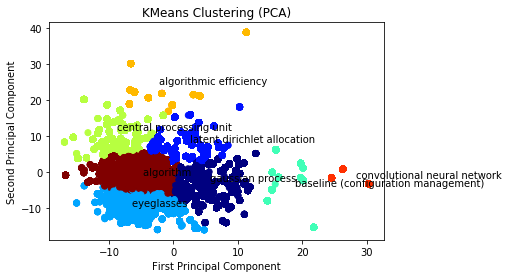

In [329]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('KMeans Clustering (PCA)')
#设置X轴标签
plt.xlabel('First Principal Component')
#设置Y轴标签
plt.ylabel('Second Principal Component')
#画散点图
ax1.scatter(X_2d[:,0],X_2d[:,1], c = X_clustered, cmap='jet', marker = 'o')
#显示所画的图
center = kmeans.cluster_centers_
for i in range(8):
    plt.annotate(temp[i],xy=(center[i,0],center[i,1]),xytext=(center[i,0],center[i,1]))
plt.savefig('kmeans.png')

In [323]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_2d)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('TSNE Clustering')
#设置X轴标签
plt.xlabel('First Principal Component')
#设置Y轴标签
plt.ylabel('Second Principal Component')
#画散点图
ax1.scatter(tsne_results[:,0],tsne_results[:,1],c = X_clustered, cmap='jet', marker = 'o')
#显示所画的图
center = kmeans.cluster_centers_
for i in range(8):
    plt.annotate(temp[i],xy=(center[i,0],center[i,1]),xytext=(center[i,0],center[i,1]))
plt.savefig('tsne.png')

KeyboardInterrupt: 

In [285]:
import numpy as np
x = np.ones(50)

In [286]:
te = np.zeros((245543, 50))

In [287]:
te[0] = x

In [288]:
te

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
!pip install sklearn